In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

datadf = pd.read_csv('data/data-and-metrics.csv')

In [2]:
def plotMetric(metric):
    plt.figure(figsize=(15,5))
    chart = sns.catplot(x=metric, 
                        y="timetaken", 
                        hue="target", 
                        data=datadf, 
                        kind="point",
                        hue_order=["gestalt","less gestalt","no target"],
                        ci=None,
                        height=5, 
                        aspect=3)

    ticks = chart.axes[0][0].get_xticks()
    xlabels = ["{:1.0f}".format(float(s)) for s in ticks]
    chart.set_xticklabels(xlabels)
    chart.set_xticklabels(rotation=90)
    sns.reset_orig()
    return chart


def plotMetricq(metric):
    datadf['q_rank'] = pd.qcut(datadf[metric], 10, labels = False) 
    plt.figure(figsize=(15,5))
    chart = sns.catplot(x='q_rank', 
                        y="timetaken", 
                        hue="target", 
                        data=datadf, 
                        kind="point",
                        hue_order=["gestalt","less gestalt","no target"],
                        ci=None,
                        height=5, 
                        aspect=3)
    
    ticks = chart.axes[0][0].get_xticks()
    xlabels = ["{:1.0f}".format(float(s)) for s in ticks]
    chart.set_xticklabels(xlabels)
    chart.set_xticklabels(rotation=90)
    sns.reset_orig()
    return chart


def plotMetricByBasemap(metric, basemap):
    datadfLim = datadf.loc[datadf['basemap'] == basemap]
    datadfLim = datadfLim.reset_index()  
    plt.figure(figsize=(15,5))
    chart = sns.catplot(x=metric, 
                        y="timetaken", 
                        hue="target", 
                        data=datadfLim, 
                        kind="point",
                        hue_order=["gestalt","less gestalt","no target"],
                        ci=None,
                        height=5, 
                        aspect=3)
    sns.reset_orig()
    return chart

def plotMetricByBasemapq(metric, basemap):
    datadfLim = datadf.loc[datadf['basemap'] == basemap]
    datadfLim = datadfLim.reset_index()   
    datadfLim['q_rank'] = pd.qcut(datadfLim[metric], 10, labels = False) 
    plt.figure(figsize=(15,5))
    chart = sns.catplot(x='q_rank', 
                        y="timetaken", 
                        hue="target", 
                        data=datadfLim, 
                        kind="point",
                        hue_order=["gestalt","less gestalt","no target"],
                        ci=None,
                        height=5, 
                        aspect=3)
    sns.reset_orig()
    return chart



def plotKDEMetric(metric):
    grouped_single = datadf.groupby([metric, 'target']).agg({'timetaken': ['mean'],'correct': ['mean']})
    grouped_single = grouped_single.reset_index()
    grouped_single.columns = [metric, 'target','timetaken_mean', 'correct_mean']
    sns.set(rc={'axes.facecolor':'#073467', 'axes.grid' : False})
    chart = sns.FacetGrid(grouped_single, 
                          col="target",
                          col_order=["gestalt","less gestalt","no target"])
    chart.map(sns.kdeplot, metric,'timetaken_mean', fill=True, thresh=0, levels=100, cmap='RdBu_r' )
    chart.fig.set_figwidth(15)
    chart.fig.set_figheight(5)
    sns.reset_orig()
    return chart

def plotKDEMetricByBasemap(metric, basemap):
    datadfLim = datadf.loc[datadf['basemap'] == basemap]
    datadfLim = datadfLim.reset_index()
    grouped_single = datadfLim.groupby([metric, 'target']).agg({'timetaken': ['mean'],'correct': ['mean']})
    grouped_single = grouped_single.reset_index()
    grouped_single.columns = [metric, 'target','timetaken_mean', 'correct_mean']
    sns.set(rc={'axes.facecolor':'#073467', 'axes.grid' : False})
    chart = sns.FacetGrid(grouped_single, 
                          col="target",
                          col_order=["gestalt","less gestalt","no target"])
    chart.map(sns.kdeplot, metric,'timetaken_mean', fill=True, thresh=0, levels=100, cmap='RdBu_r' )
    chart.fig.set_figwidth(15)
    chart.fig.set_figheight(5)
    sns.reset_orig()
    return chart

<Figure size 1080x360 with 0 Axes>

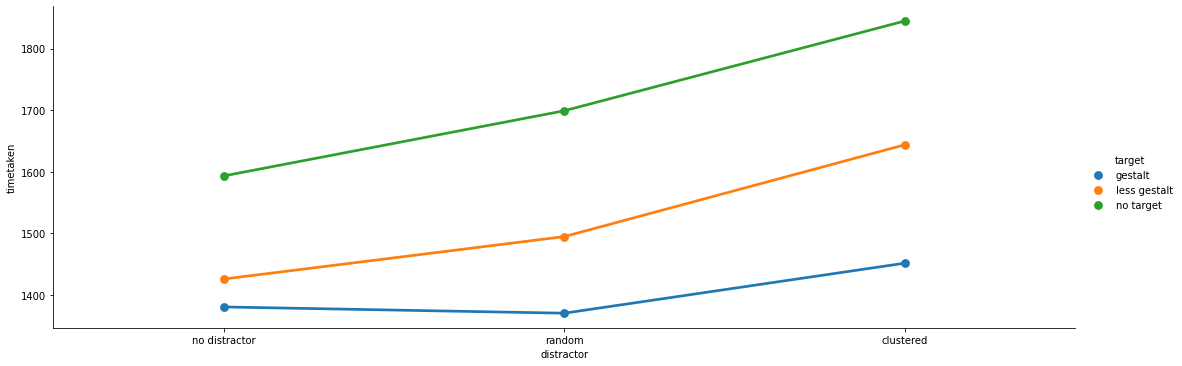

In [3]:
plt.figure(figsize=(15,5))
chart = sns.catplot(x="distractor", y="timetaken", hue="target", data=datadf, kind="point",
                      order=["no distractor","random","clustered"],
                      hue_order=["gestalt","less gestalt","no target"], ci=None, height=5, aspect=3)


<Figure size 1080x360 with 0 Axes>

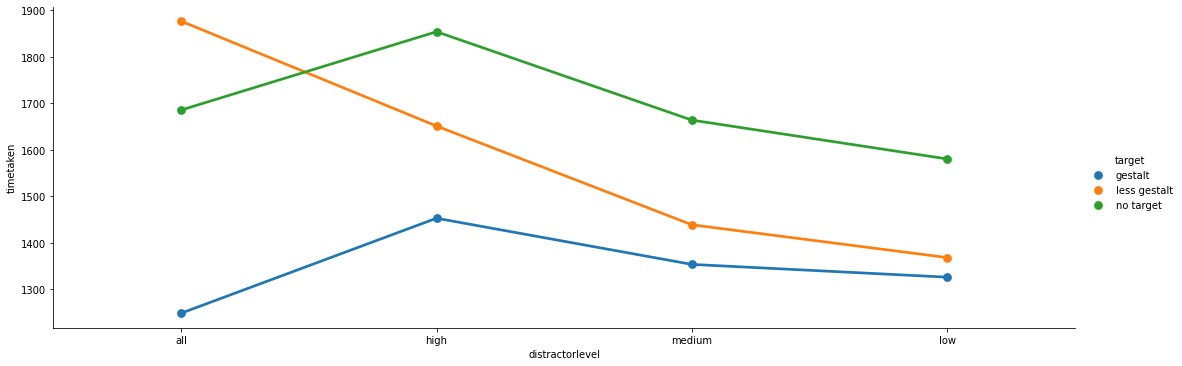

In [4]:
dflim = datadf.loc[datadf['distractor'] == 'random']

plt.figure(figsize=(15,5))
chart = sns.catplot(x="distractorlevel", y="timetaken", hue="target", data=dflim, kind="point",
                    hue_order=["gestalt","less gestalt","no target"],
                    order=["all","high","medium","low"],
                    ci=None,height=5, aspect=3)
sns.reset_orig()

<Figure size 1080x360 with 0 Axes>

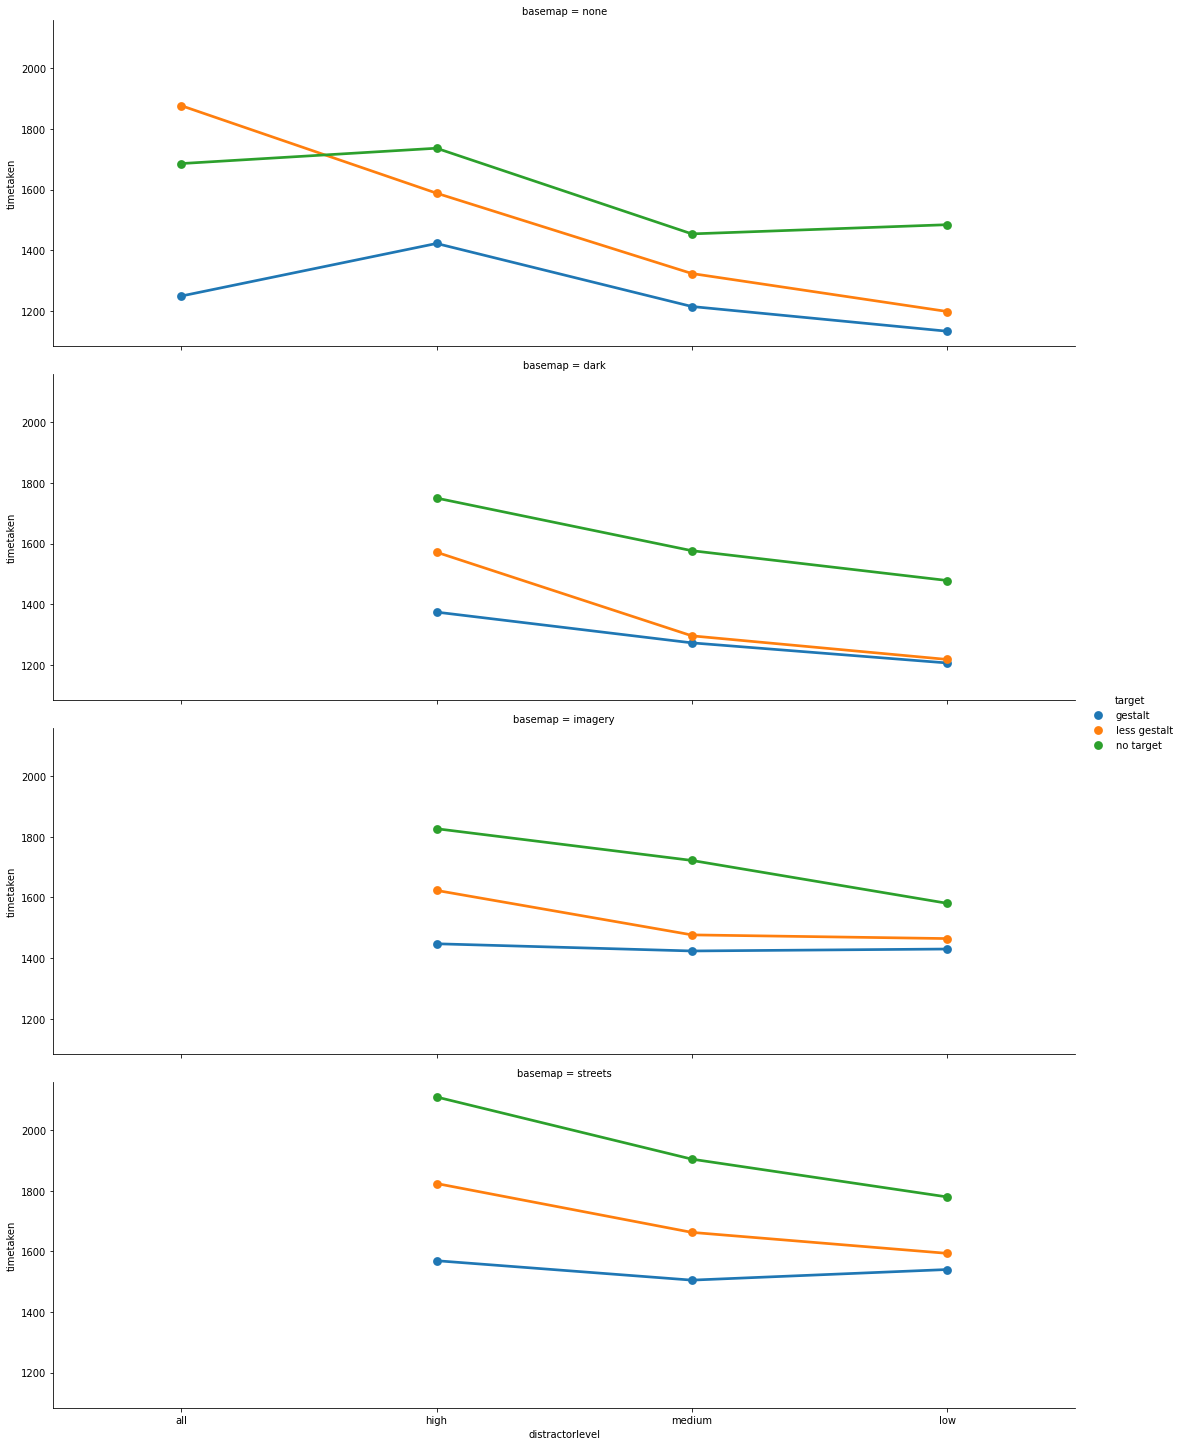

In [5]:
dflim = datadf.loc[datadf['distractor'] == 'random']

plt.figure(figsize=(15,5))
chart = sns.catplot(x="distractorlevel", y="timetaken", hue="target", row="basemap", data=dflim, kind="point",
                    hue_order=["gestalt","less gestalt","no target"],
                    row_order=["none", "dark", "imagery", "streets"],
                    order=["all","high","medium","low"],
                    ci=None,height=5, aspect=3)
sns.reset_orig()

<Figure size 1080x360 with 0 Axes>

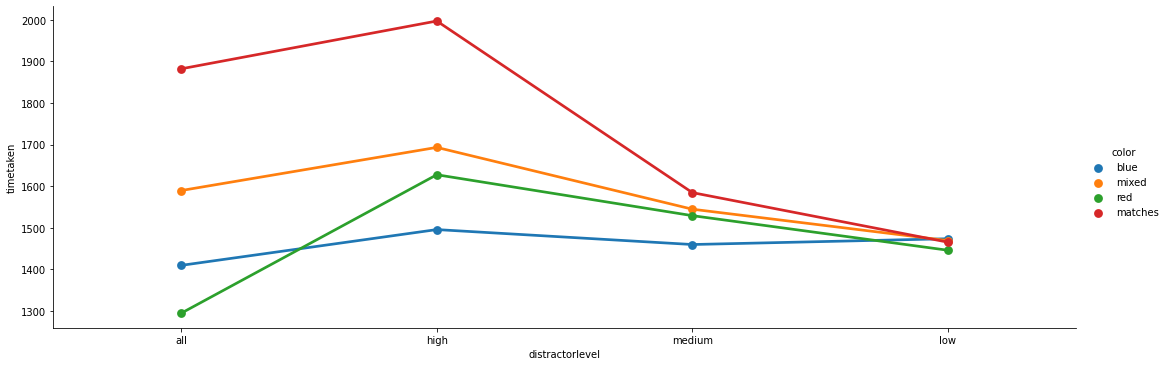

In [6]:
dflim = datadf.loc[datadf['distractor'] == 'random']

plt.figure(figsize=(15,5))
chart = sns.catplot(x="distractorlevel", y="timetaken", hue="color", data=dflim, kind="point",
                    hue_order=["blue","mixed","red","matches"],
                    order=["all","high","medium","low"],
                    ci=None,height=5, aspect=3)
sns.reset_orig()

<Figure size 1080x360 with 0 Axes>

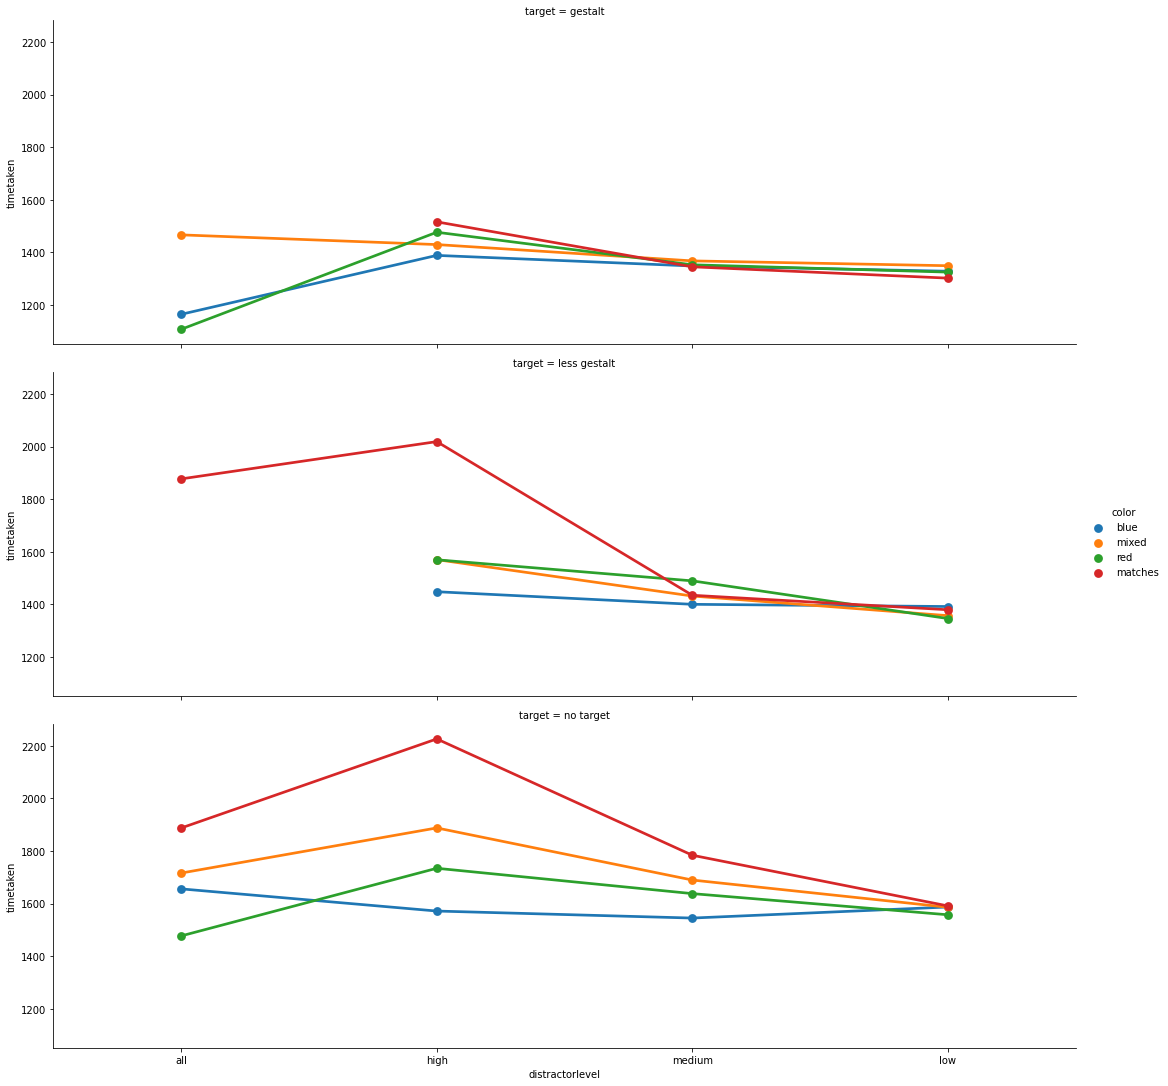

In [7]:
dflim = datadf.loc[datadf['distractor'] == 'random']

plt.figure(figsize=(15,5))
chart = sns.catplot(x="distractorlevel", y="timetaken", hue="color", row="target", data=dflim, kind="point",
                    hue_order=["blue","mixed","red","matches"],
                    row_order=["gestalt","less gestalt","no target"],
                    order=["all","high","medium","low"],
                    ci=None,height=5, aspect=3)
sns.reset_orig()

<Figure size 1080x360 with 0 Axes>

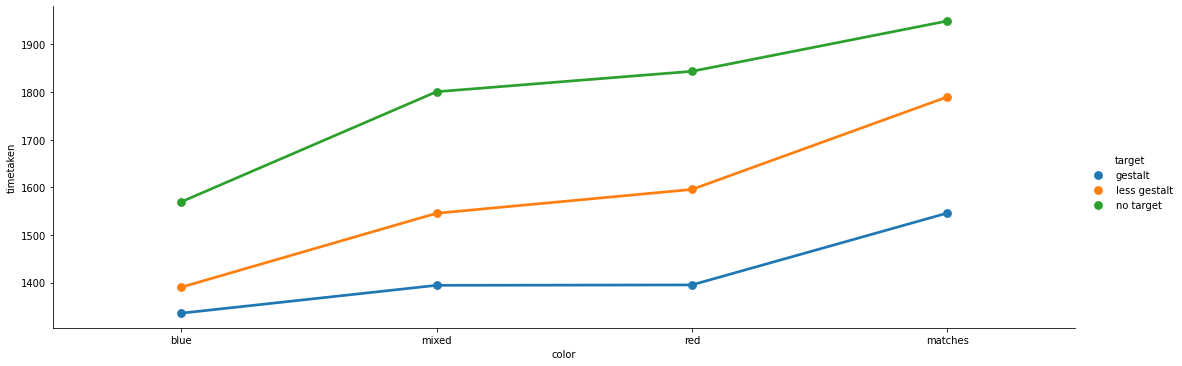

In [8]:
plt.figure(figsize=(15,5))
chart = sns.catplot(x="color", y="timetaken", hue="target", data=datadf, kind="point",
                      order=["blue","mixed","red","matches"],
                      hue_order=["gestalt","less gestalt","no target"], ci=None, height=5, aspect=3)


<Figure size 1080x360 with 0 Axes>

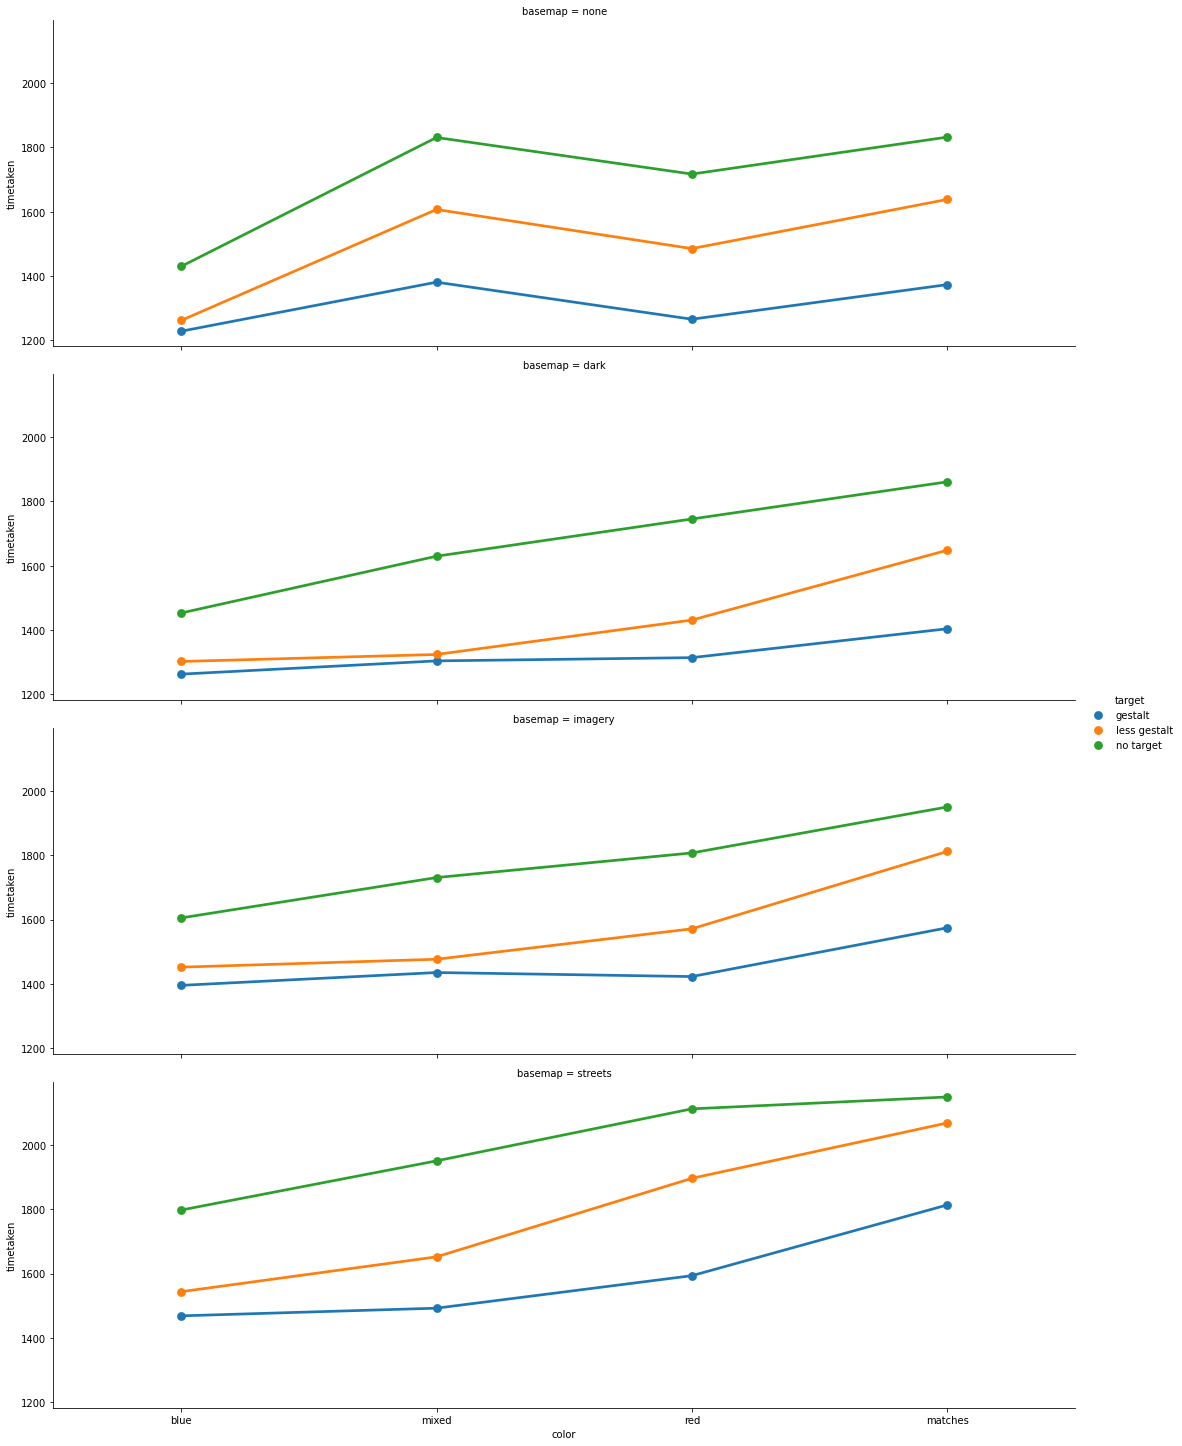

In [9]:
plt.figure(figsize=(15,5))
chart = sns.catplot(x="color", y="timetaken", hue="target", row="basemap", data=datadf, kind="point",
                    order=["blue","mixed","red","matches"],
                    row_order=["none", "dark", "imagery", "streets"],
                    hue_order=["gestalt","less gestalt","no target"], ci=None, height=5, aspect=3)

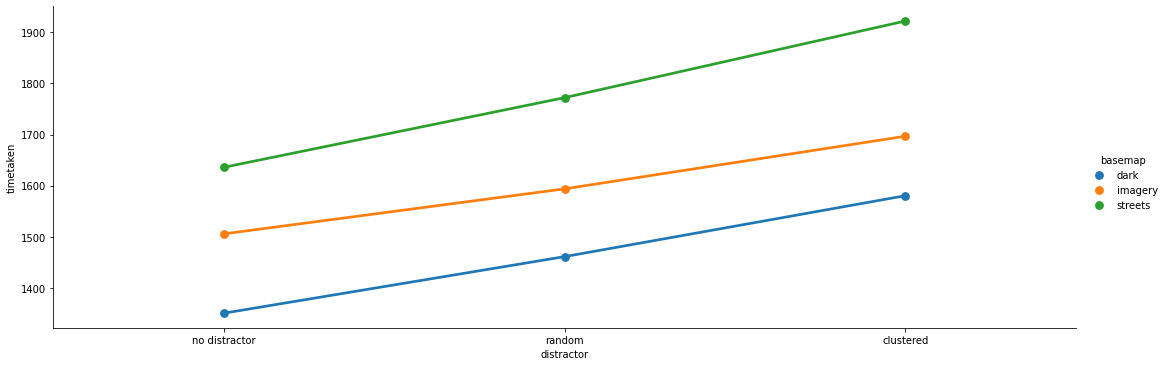

In [10]:
# dflim = datadf.loc[datadf['basemap'] != 'none']

chart = sns.catplot(x="distractor", y="timetaken", hue="basemap", data=datadf, kind="point", 
                    order=["no distractor","random","clustered"],
                    hue_order=["dark","imagery","streets"],
                    ci=None, height=5, aspect=3)

<Figure size 1080x360 with 0 Axes>

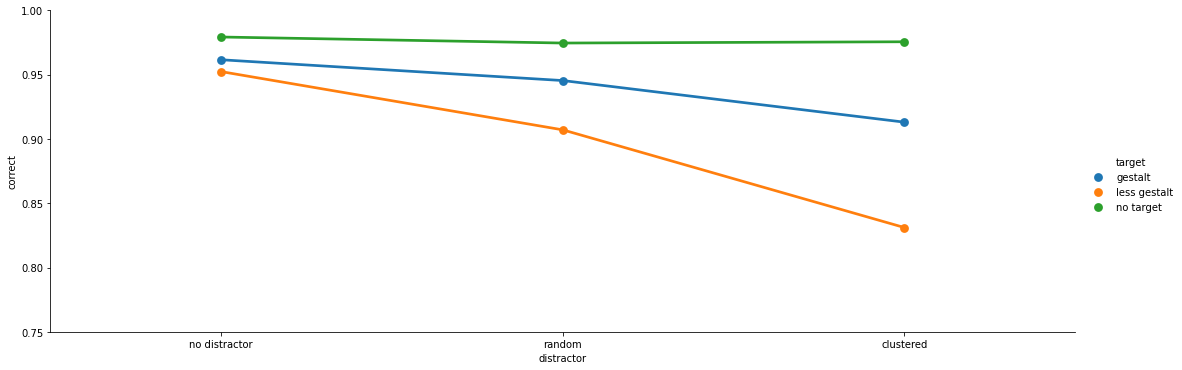

In [11]:
plt.figure(figsize=(15,5))
chart = sns.catplot(x="distractor", y="correct", hue="target", data=datadf, kind="point",
                      order=["no distractor","random","clustered"],
                      hue_order=["gestalt","less gestalt","no target"], ci=None, height=5, aspect=3)

chart.set(ylim=((.75, 1)))


<Figure size 1080x360 with 0 Axes>

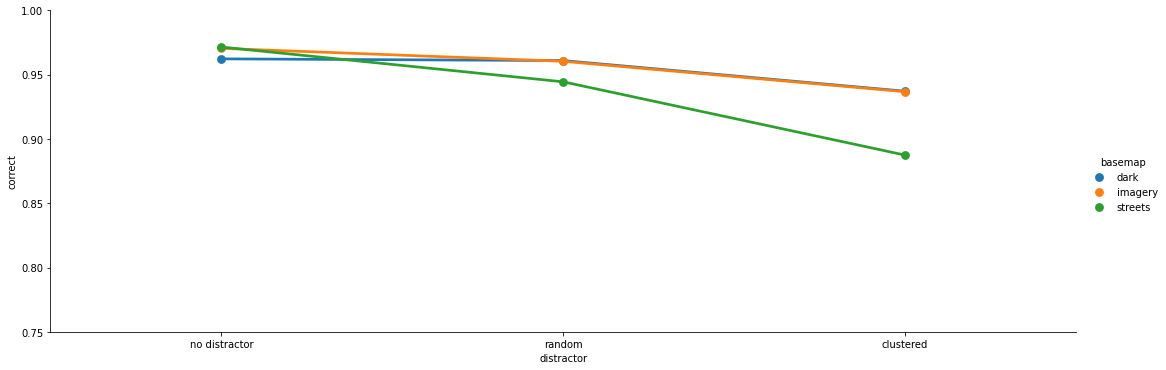

In [12]:
plt.figure(figsize=(15,5))
chart = sns.catplot(x="distractor", y="correct", hue="basemap", data=datadf, kind="point",
                      order=["no distractor","random","clustered"],
                     hue_order=["dark","imagery","streets"], ci=None, height=5, aspect=3)

chart.set(ylim=((.75, 1)))

<Figure size 1080x360 with 0 Axes>

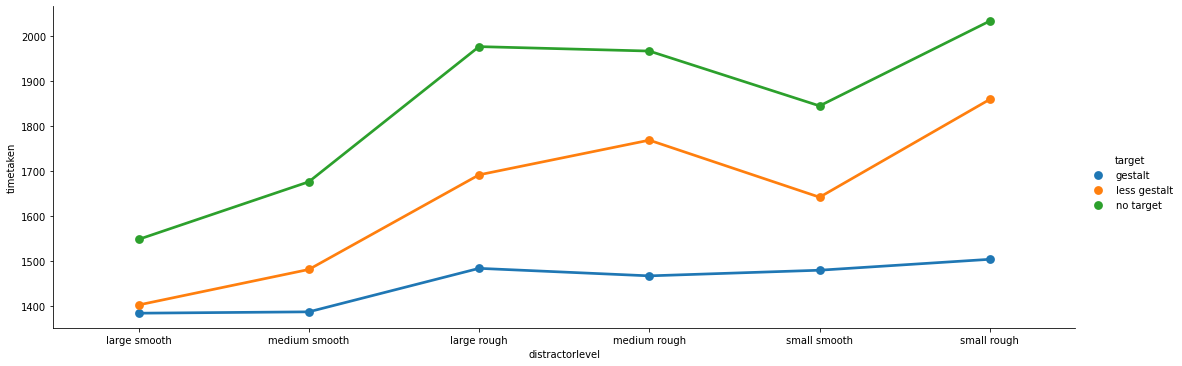

In [13]:
dflim = datadf.loc[datadf['distractor'] == 'clustered']

plt.figure(figsize=(15,5))
chart = sns.catplot(x="distractorlevel", y="timetaken", hue="target", data=dflim, kind="point",
                    hue_order=["gestalt","less gestalt","no target"],
                    order=["large smooth","medium smooth","large rough","medium rough","small smooth","small rough"],
                    ci=None,height=5, aspect=3)
sns.reset_orig()

<Figure size 1080x360 with 0 Axes>

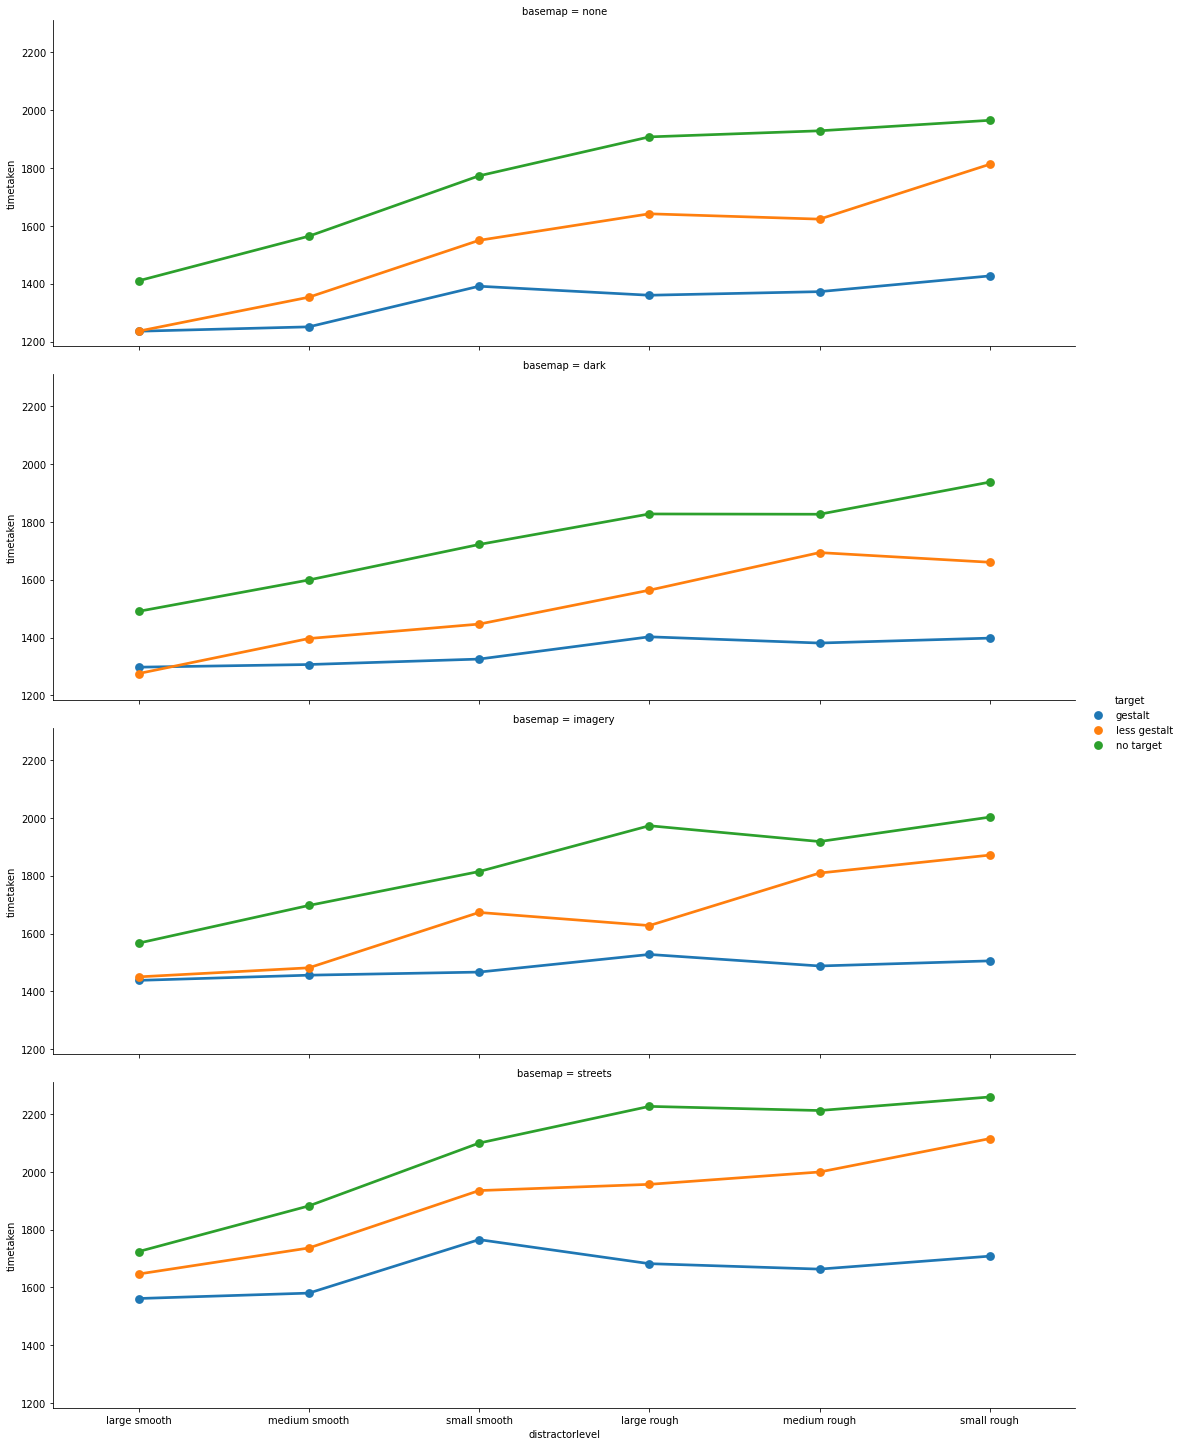

In [14]:
dflim = datadf.loc[datadf['distractor'] == 'clustered']
plt.figure(figsize=(15,5))
chart = sns.catplot(x="distractorlevel", y="timetaken", hue="target", data=dflim, row="basemap", kind="point",
                    hue_order=["gestalt","less gestalt","no target"],
                    row_order=["none", "dark", "imagery", "streets"],
                    order=["large smooth","medium smooth","small smooth","large rough","medium rough","small rough"],
                    ci=None,height=5, aspect=3)
sns.reset_orig()


<Figure size 1080x360 with 0 Axes>

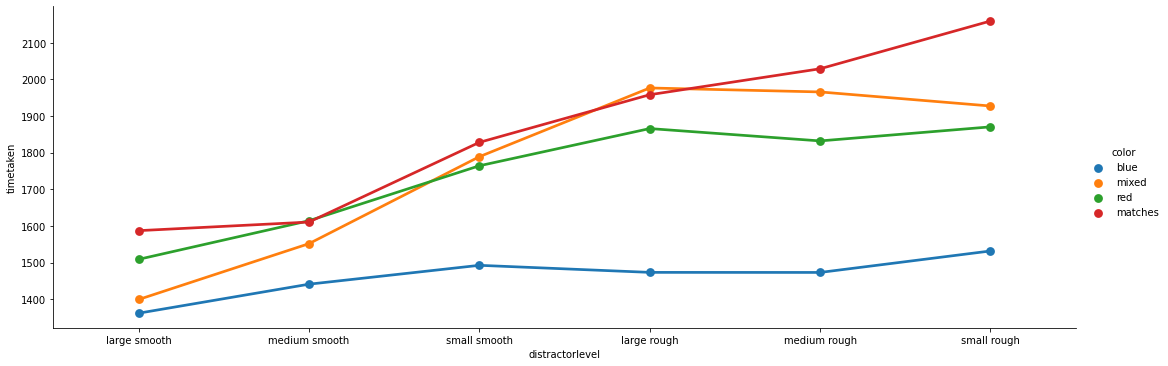

In [15]:
dflim = datadf.loc[datadf['distractor'] == 'clustered']

plt.figure(figsize=(15,5))
chart = sns.catplot(x="distractorlevel", y="timetaken", hue="color", data=dflim, kind="point",
                    hue_order=["blue","mixed","red","matches"],
                    order=["large smooth","medium smooth","small smooth","large rough","medium rough","small rough"],
                    ci=None,height=5, aspect=3)
sns.reset_orig()

<Figure size 1080x360 with 0 Axes>

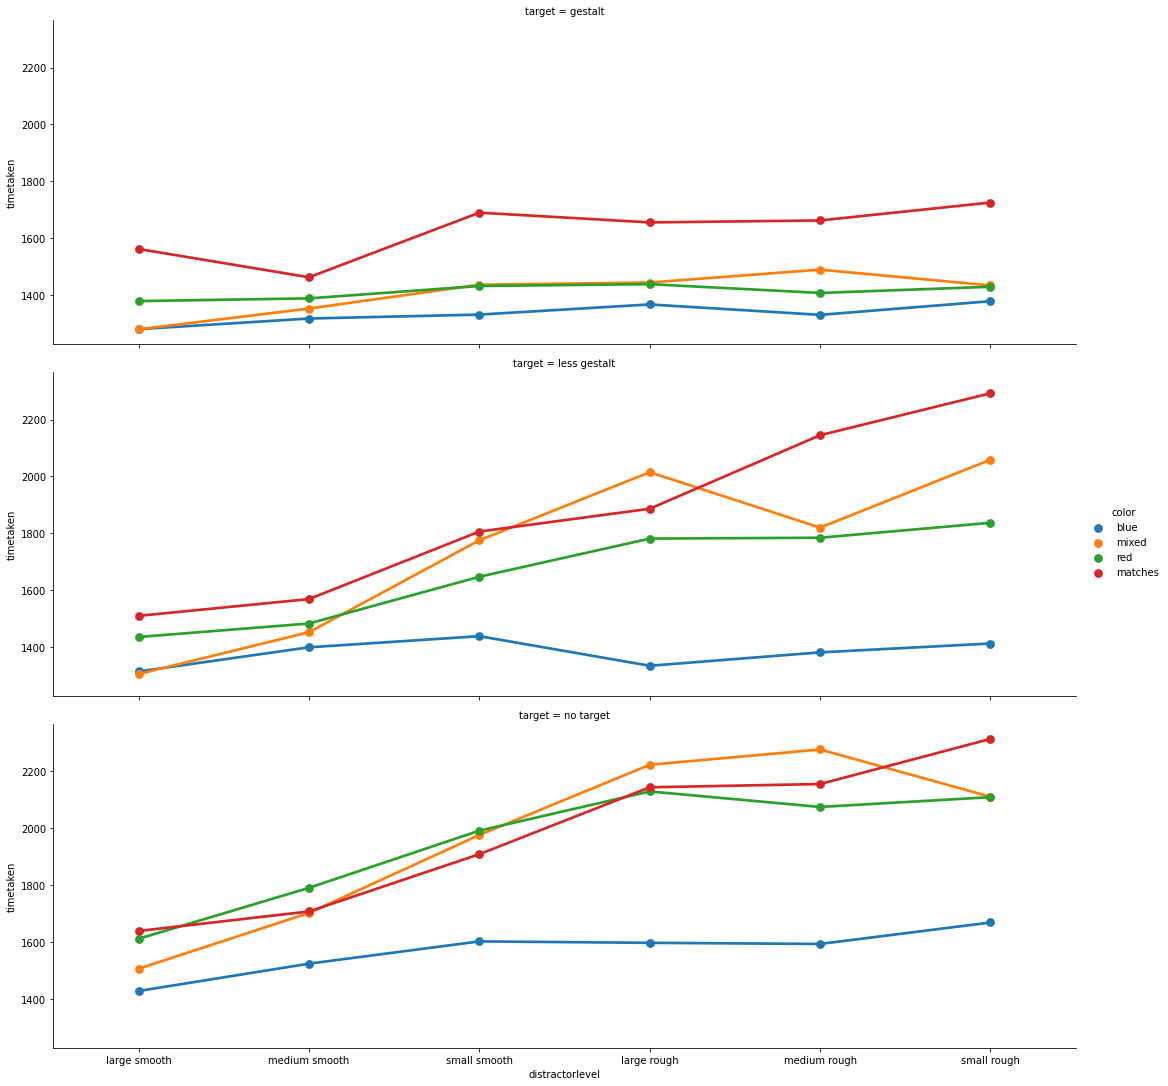

In [16]:
dflim = datadf.loc[datadf['distractor'] == 'clustered']

plt.figure(figsize=(15,5))
chart = sns.catplot(x="distractorlevel", y="timetaken", hue="color", row='target', data=dflim, kind="point",
                    hue_order=["blue","mixed","red","matches"],
                    row_order=["gestalt","less gestalt","no target"],
                    order=["large smooth","medium smooth","small smooth","large rough","medium rough","small rough"],
                    ci=None,height=5, aspect=3)
sns.reset_orig()

<Figure size 1080x360 with 0 Axes>

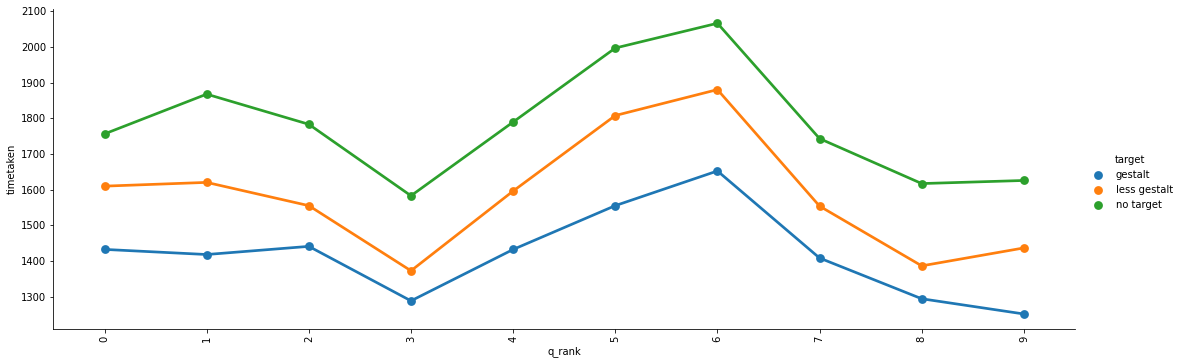

In [17]:
chart = plotMetricq('contagion')


<Figure size 1080x360 with 0 Axes>

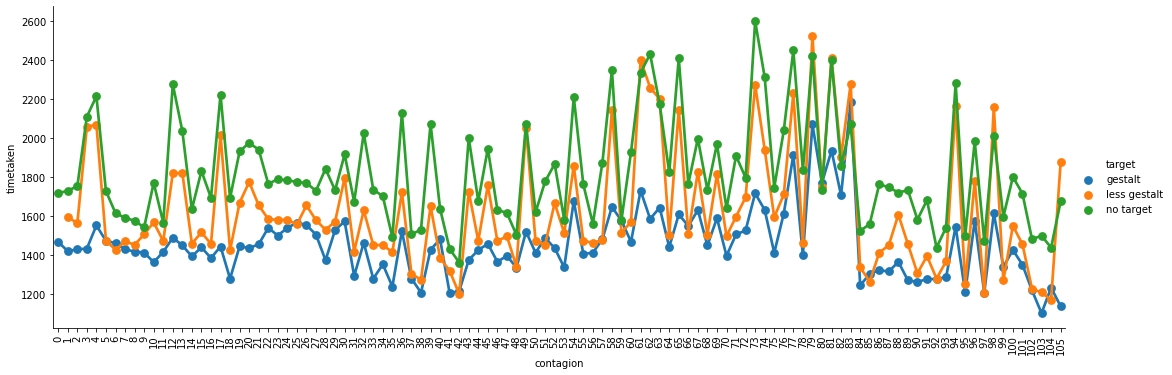

In [18]:
chart = plotMetric('contagion')


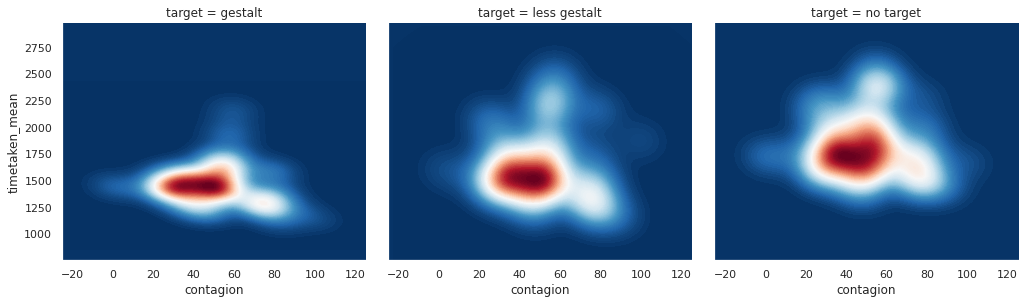

In [19]:
chart = plotKDEMetric('contagion')

<Figure size 1080x360 with 0 Axes>

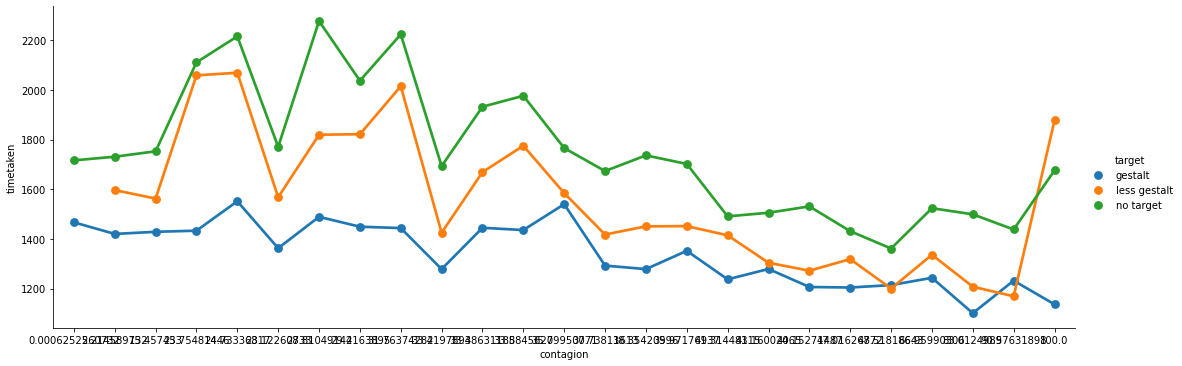

In [20]:
chart = plotMetricByBasemap('contagion','none')


<Figure size 1080x360 with 0 Axes>

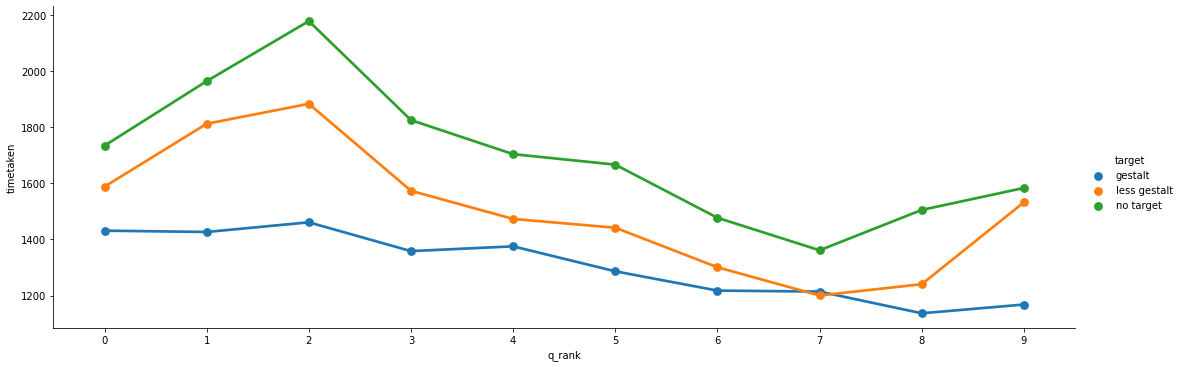

In [21]:
chart = plotMetricByBasemapq('contagion','none')


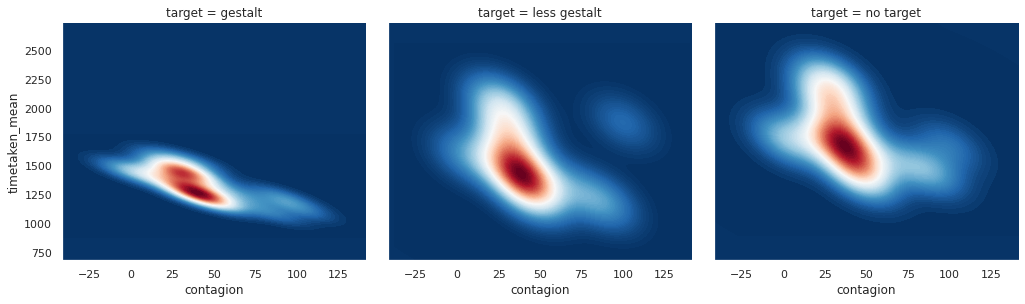

In [22]:
chart = plotKDEMetricByBasemap('contagion','none')

<Figure size 1080x360 with 0 Axes>

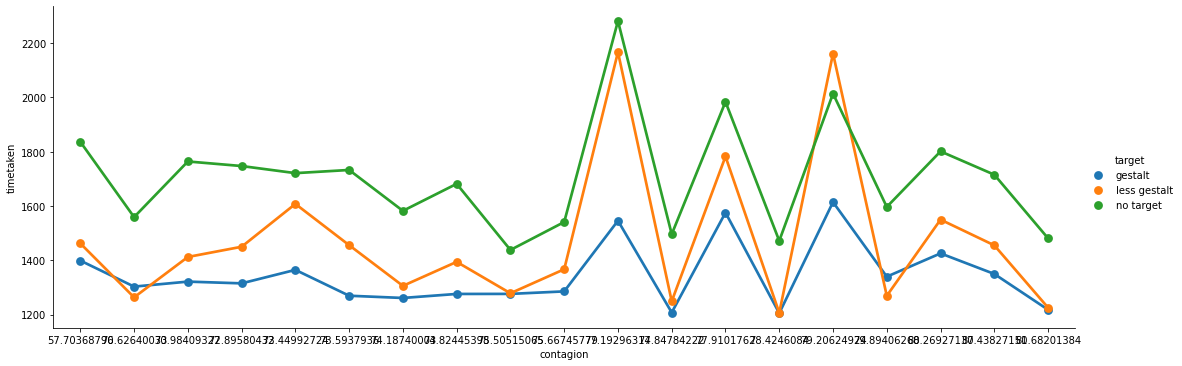

In [23]:
chart = plotMetricByBasemap('contagion','dark')

<Figure size 1080x360 with 0 Axes>

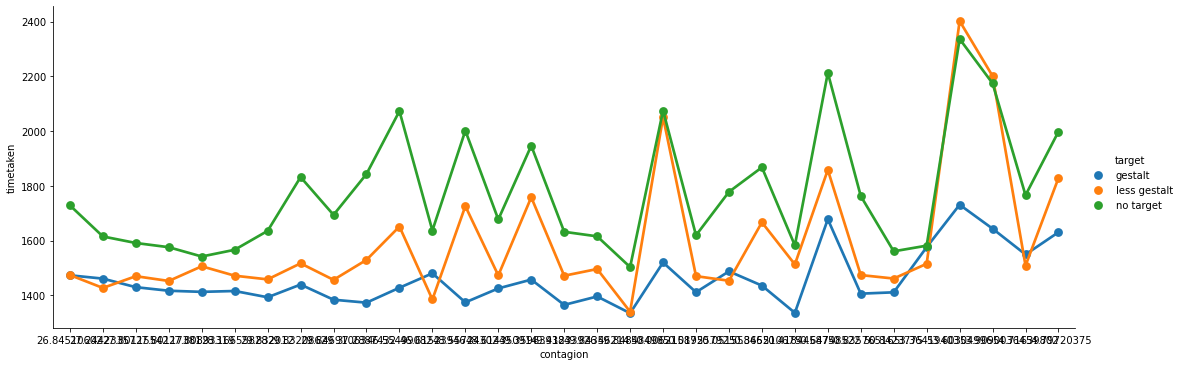

In [24]:
chart = plotMetricByBasemap('contagion','imagery')

<Figure size 1080x360 with 0 Axes>

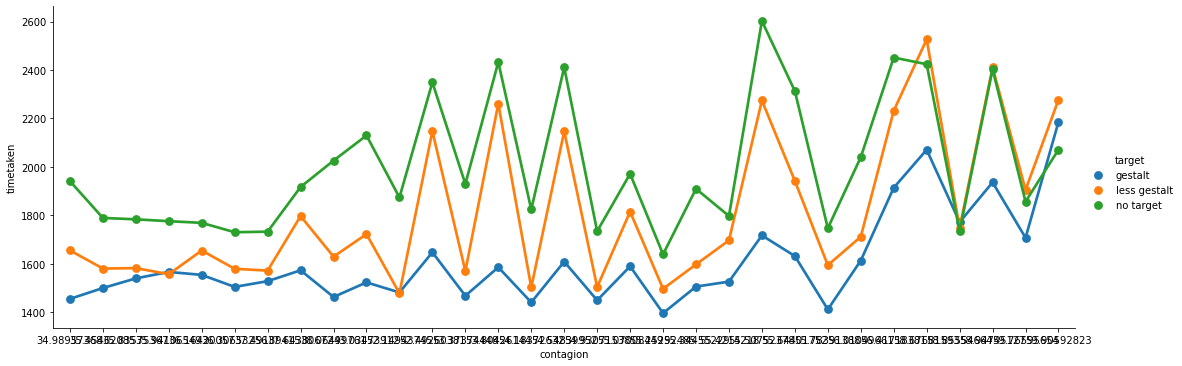

In [25]:
chart = plotMetricByBasemap('contagion','streets')

<Figure size 1080x360 with 0 Axes>

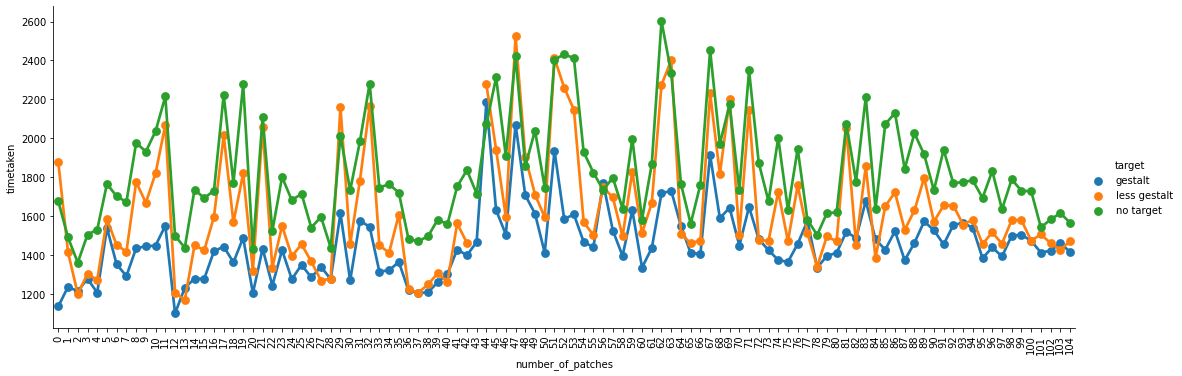

In [26]:
chart = plotMetric('number_of_patches')

<Figure size 1080x360 with 0 Axes>

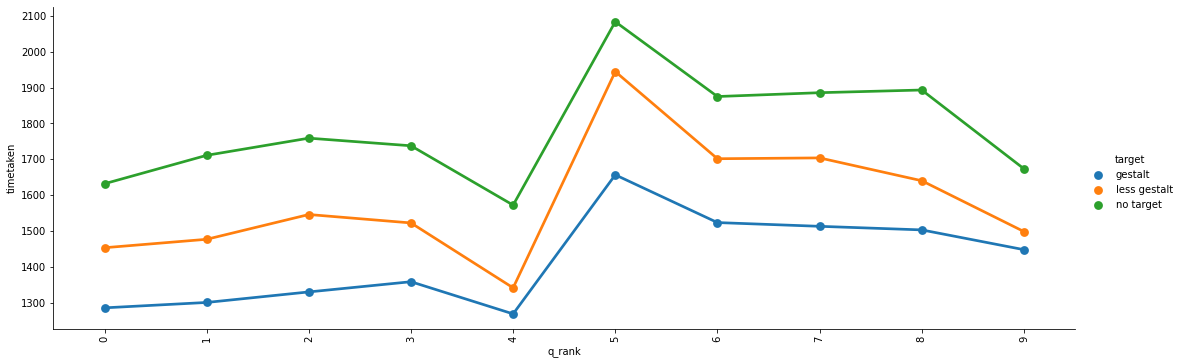

In [27]:
chart = plotMetricq('number_of_patches')


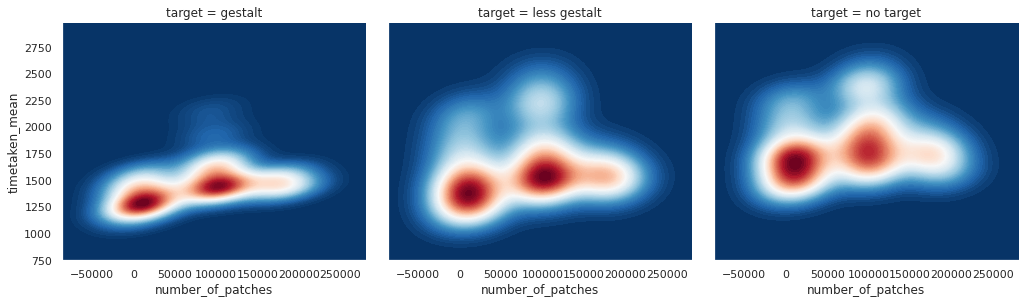

In [28]:
chart = plotKDEMetric('number_of_patches')

<Figure size 1080x360 with 0 Axes>

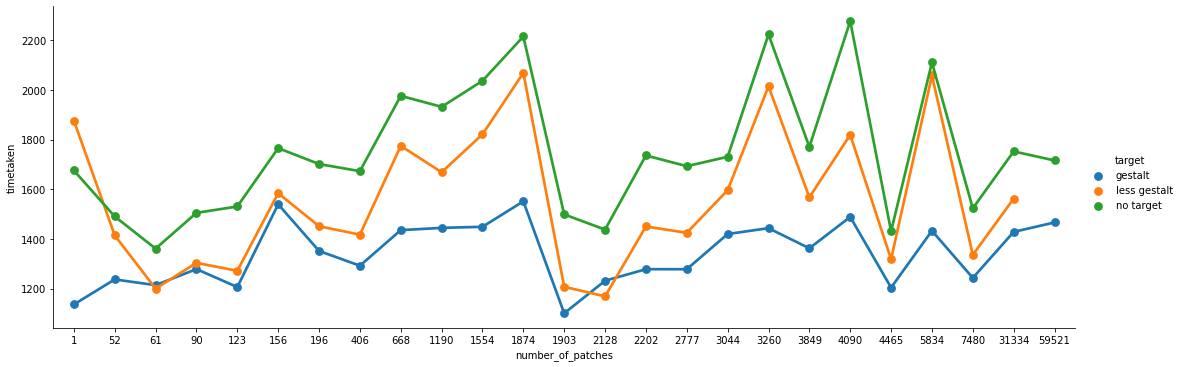

In [29]:
chart = plotMetricByBasemap('number_of_patches','none')

<Figure size 1080x360 with 0 Axes>

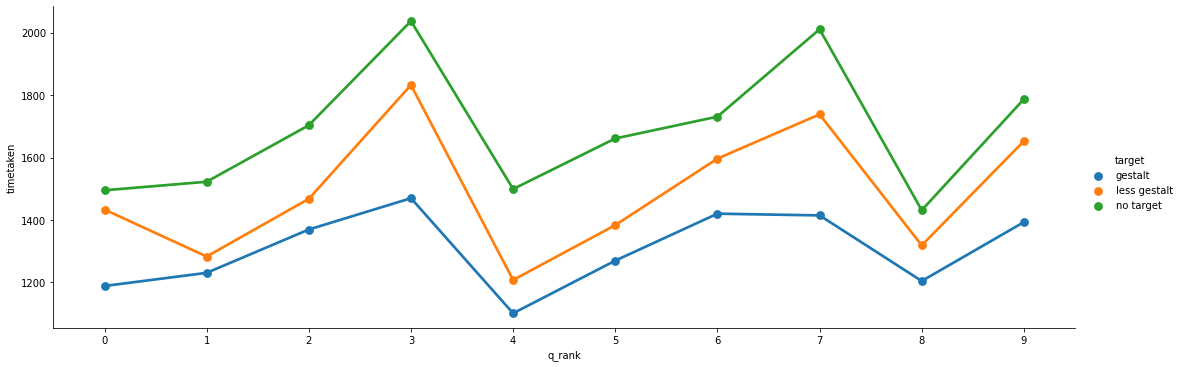

In [30]:
chart = plotMetricByBasemapq('number_of_patches','none')

<Figure size 1080x360 with 0 Axes>

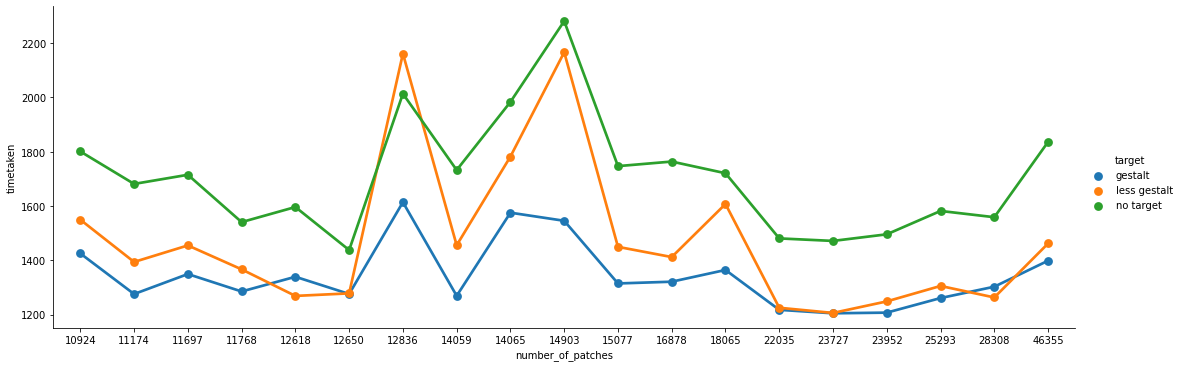

In [31]:
chart = plotMetricByBasemap('number_of_patches','dark')

<Figure size 1080x360 with 0 Axes>

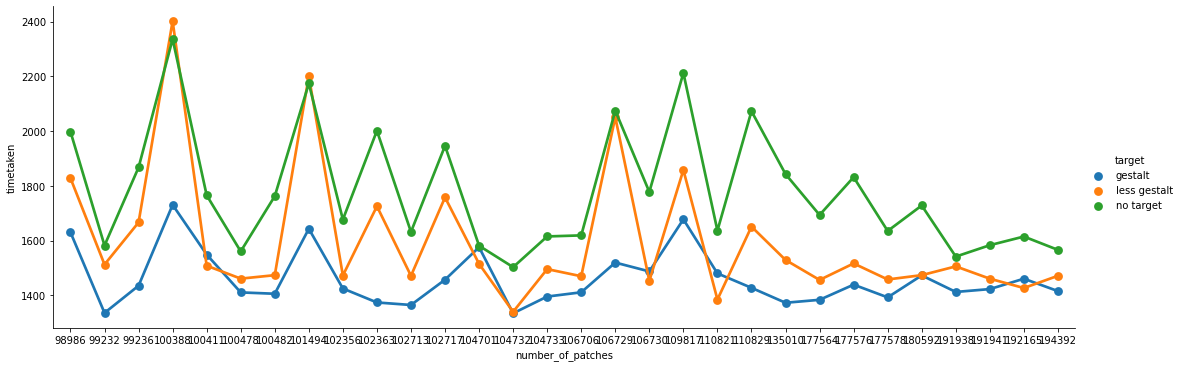

In [32]:
chart = plotMetricByBasemap('number_of_patches','imagery')

<Figure size 1080x360 with 0 Axes>

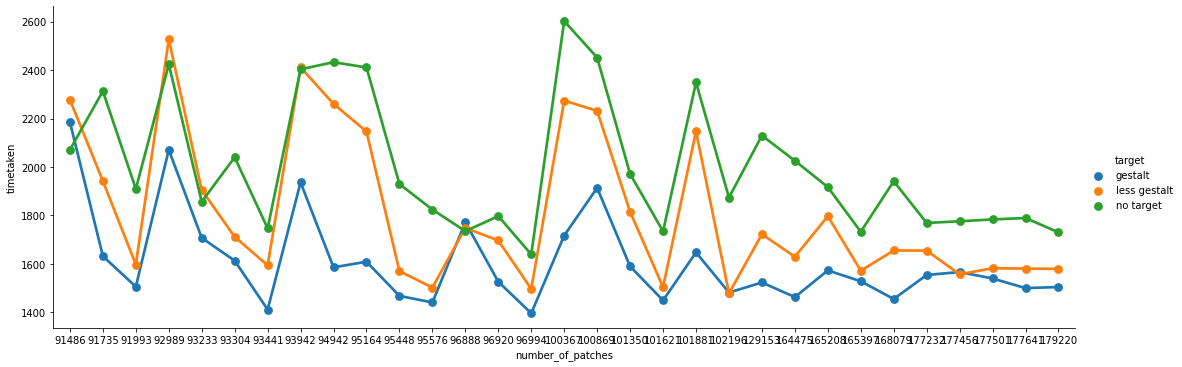

In [33]:
chart = plotMetricByBasemap('number_of_patches','streets')

<Figure size 1080x360 with 0 Axes>

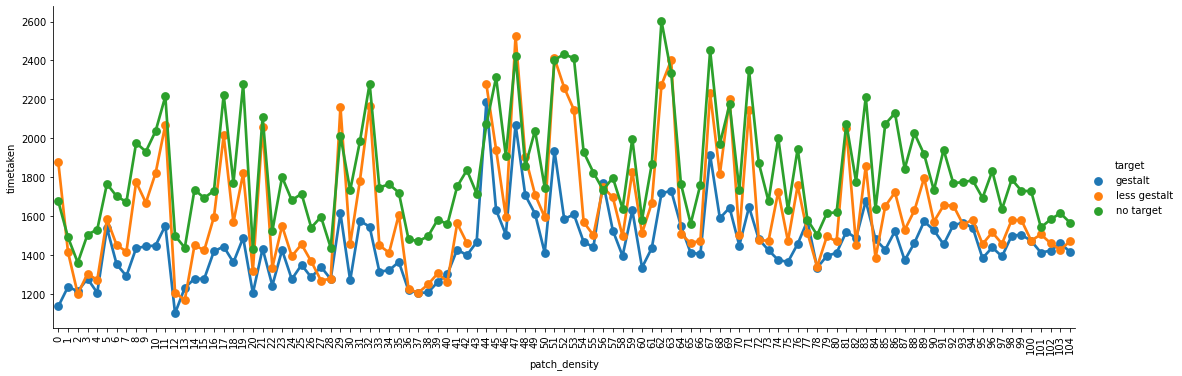

In [34]:
chart = plotMetric('patch_density')

<Figure size 1080x360 with 0 Axes>

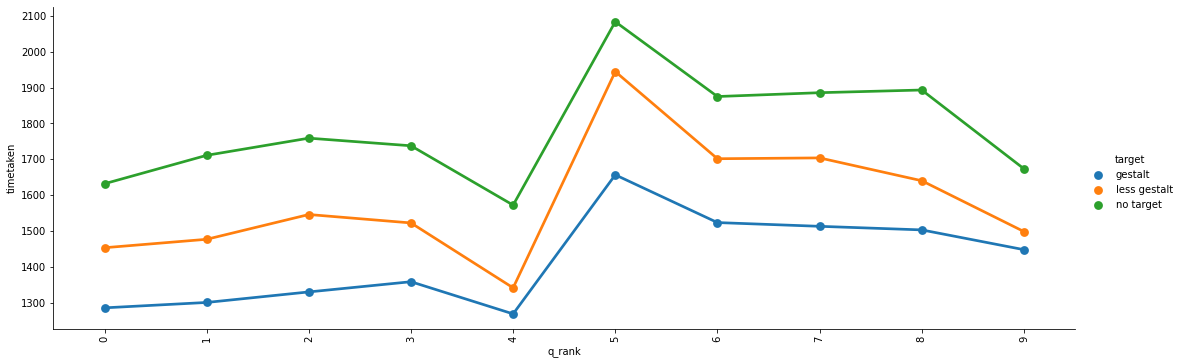

In [35]:
chart = plotMetricq('patch_density')


<Figure size 1080x360 with 0 Axes>

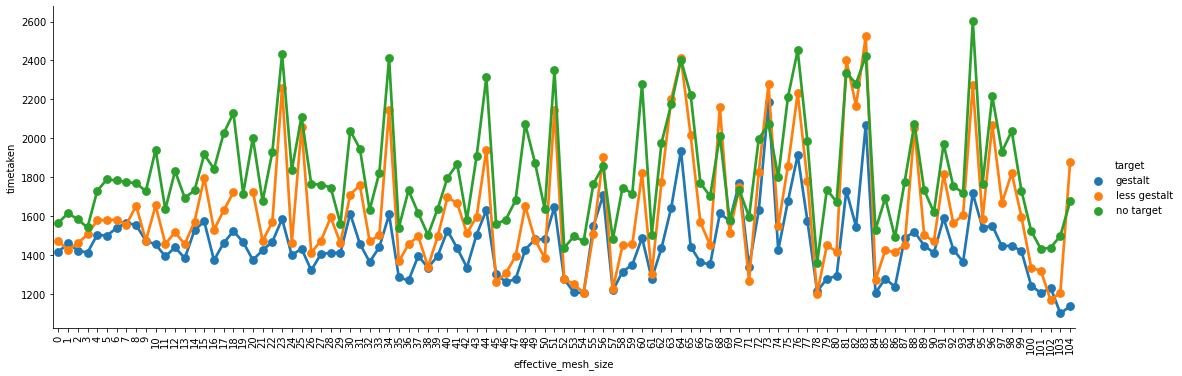

In [36]:
chart = plotMetric('effective_mesh_size')

<Figure size 1080x360 with 0 Axes>

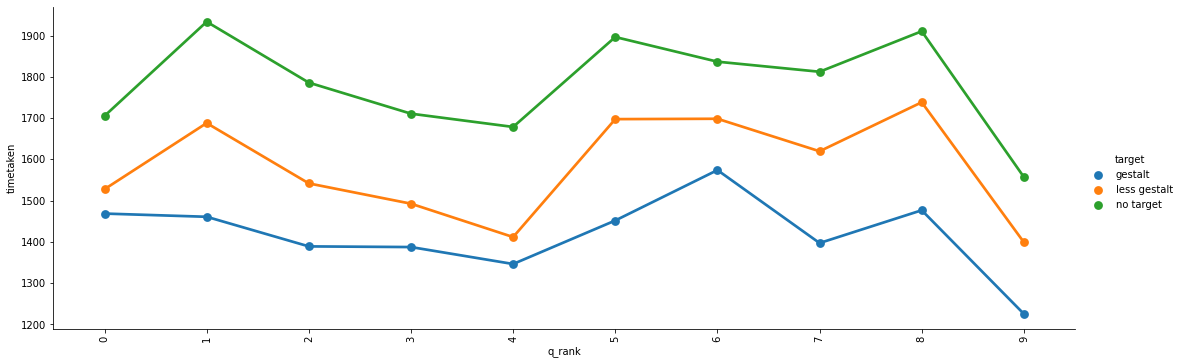

In [37]:
chart = plotMetricq('effective_mesh_size')


<Figure size 1080x360 with 0 Axes>

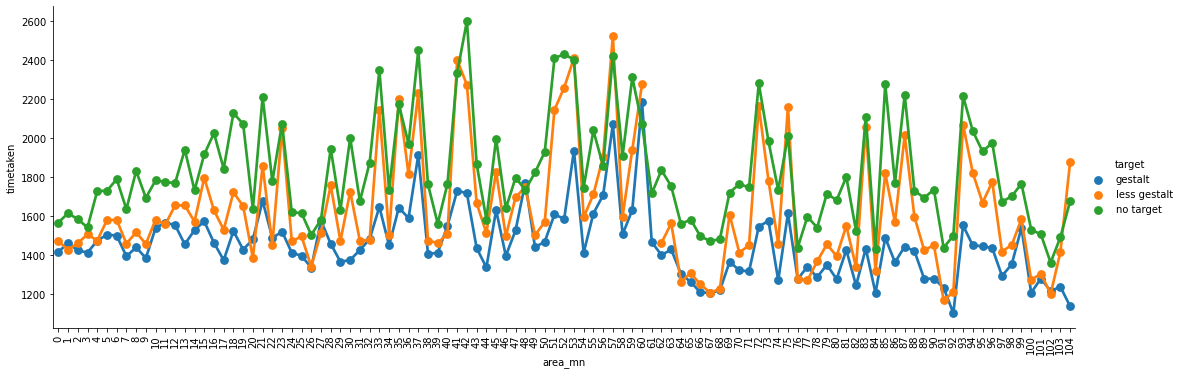

In [38]:
chart = plotMetric('area_mn')

<Figure size 1080x360 with 0 Axes>

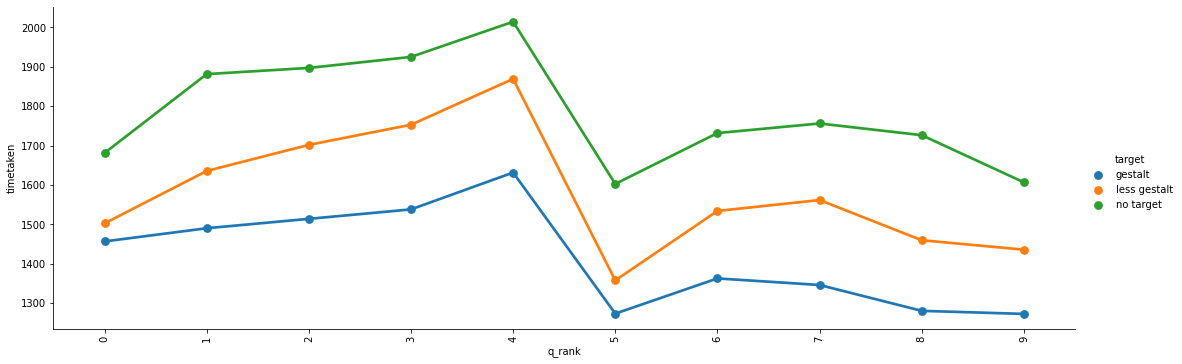

In [39]:
chart = plotMetricq('area_mn')


<Figure size 1080x360 with 0 Axes>

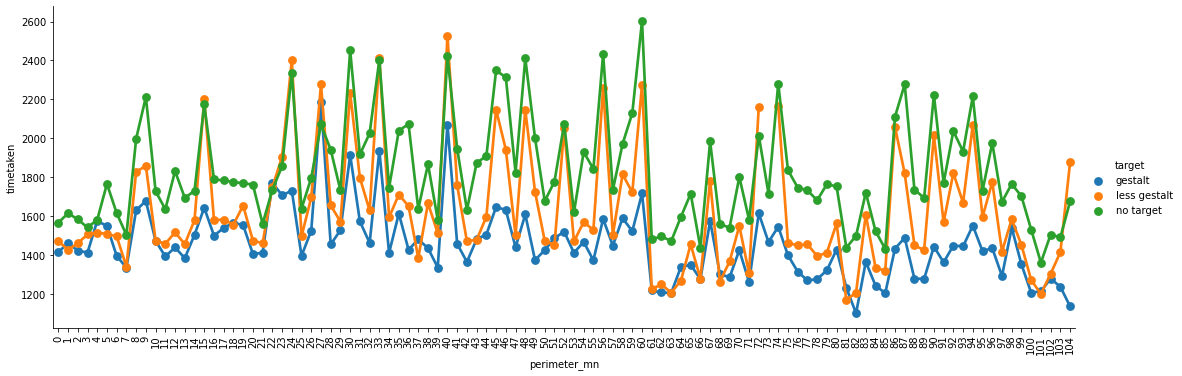

In [40]:
chart = plotMetric('perimeter_mn')

<Figure size 1080x360 with 0 Axes>

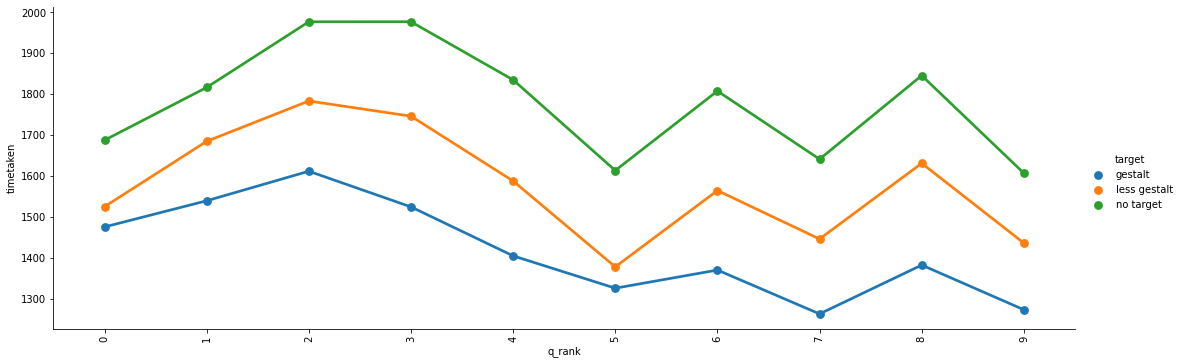

In [41]:
chart = plotMetricq('perimeter_mn')

<Figure size 1080x360 with 0 Axes>

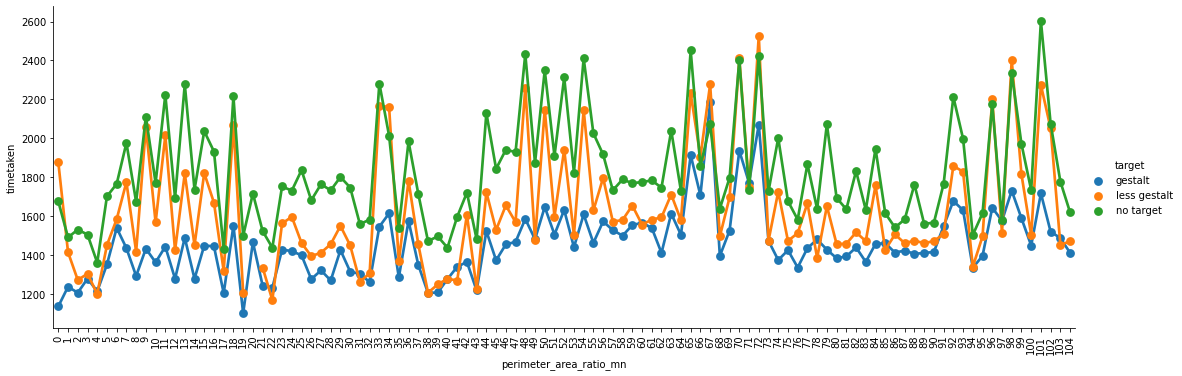

In [42]:
chart = plotMetric('perimeter_area_ratio_mn')

<Figure size 1080x360 with 0 Axes>

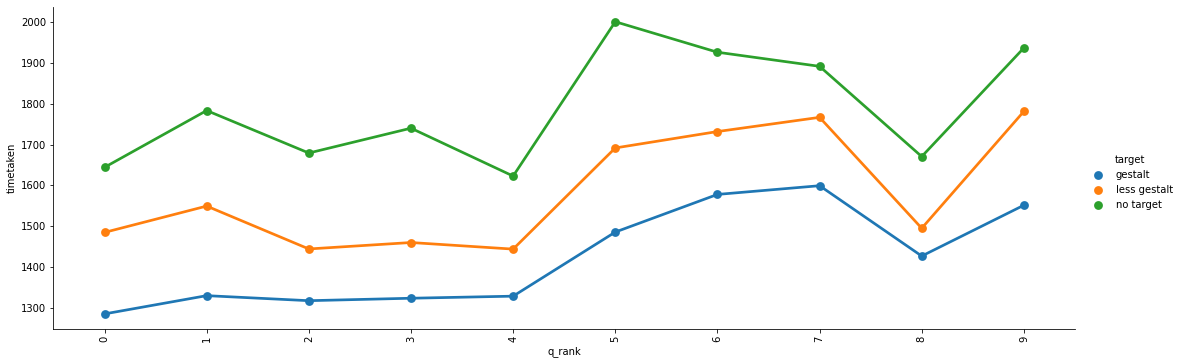

In [43]:
chart = plotMetricq('perimeter_area_ratio_mn')

<Figure size 1080x360 with 0 Axes>

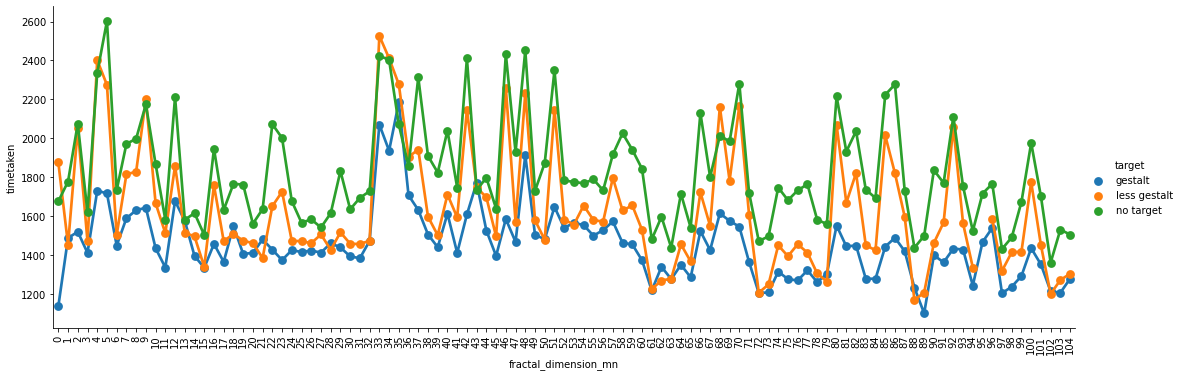

In [44]:
chart = plotMetric('fractal_dimension_mn')

<Figure size 1080x360 with 0 Axes>

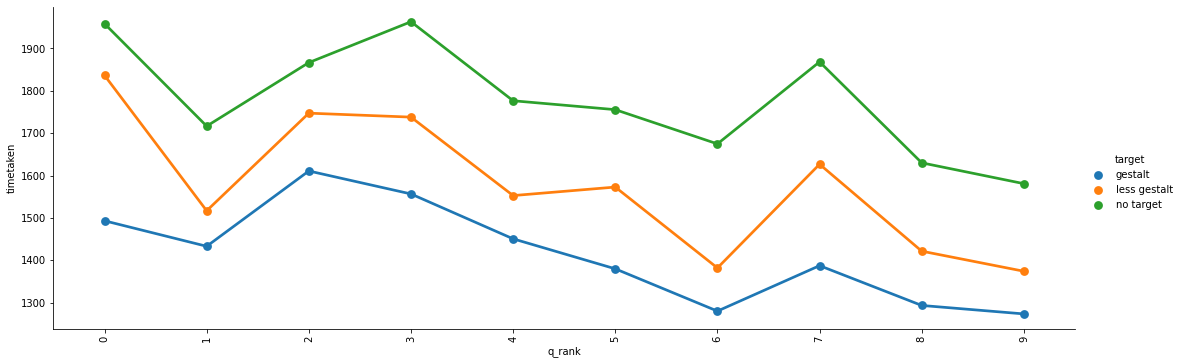

In [45]:
chart = plotMetricq('fractal_dimension_mn')

<Figure size 1080x360 with 0 Axes>

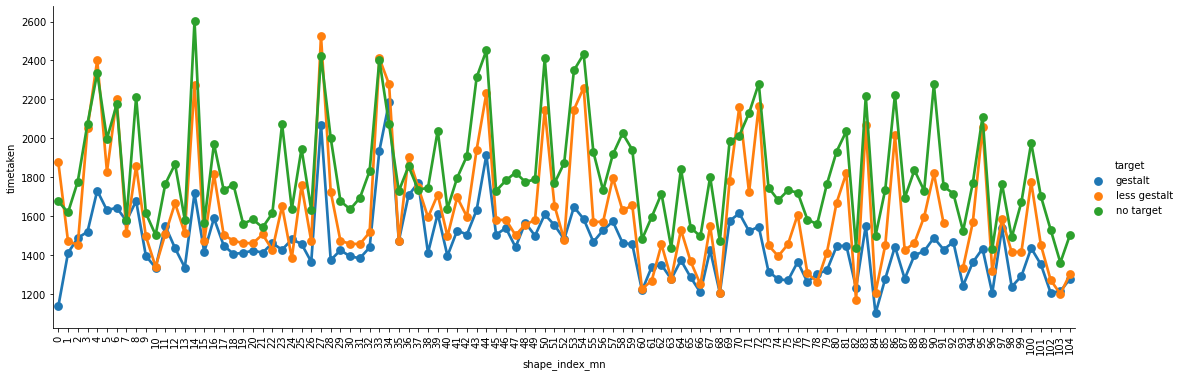

In [46]:
chart = plotMetric('shape_index_mn')

<Figure size 1080x360 with 0 Axes>

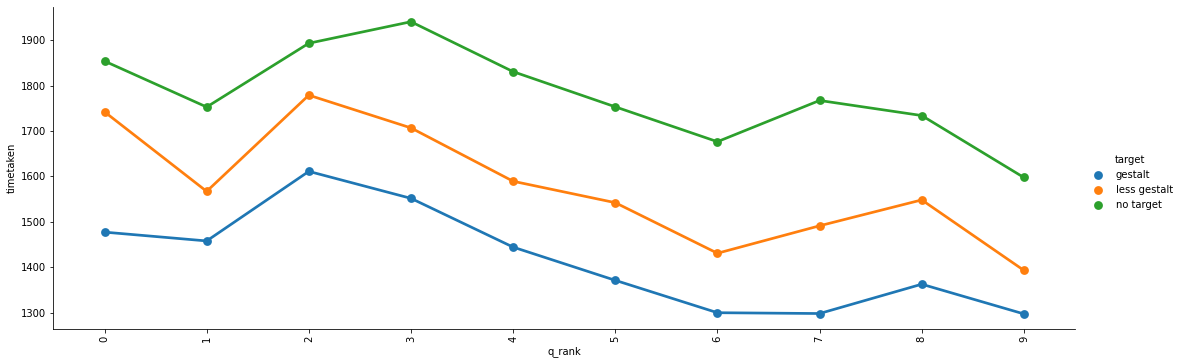

In [47]:
chart = plotMetricq('shape_index_mn')

<Figure size 1080x360 with 0 Axes>

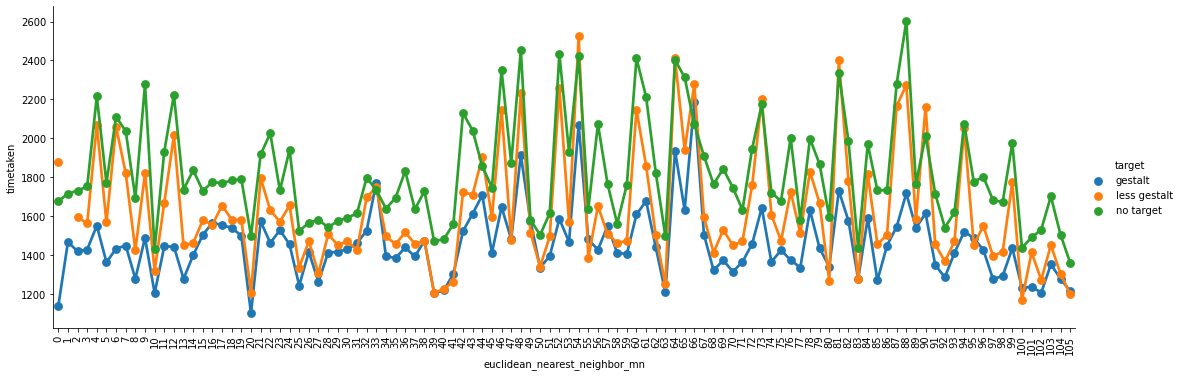

In [48]:
chart = plotMetric('euclidean_nearest_neighbor_mn')

<Figure size 1080x360 with 0 Axes>

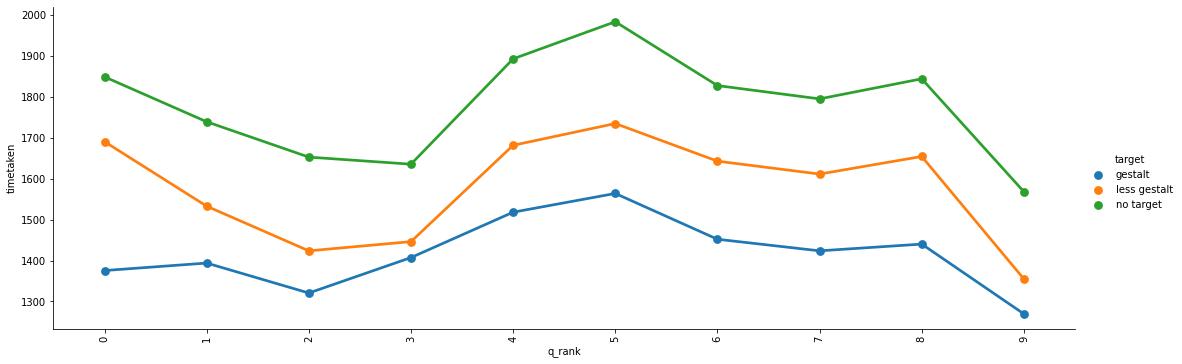

In [49]:
chart = plotMetricq('euclidean_nearest_neighbor_mn')


<Figure size 1080x360 with 0 Axes>

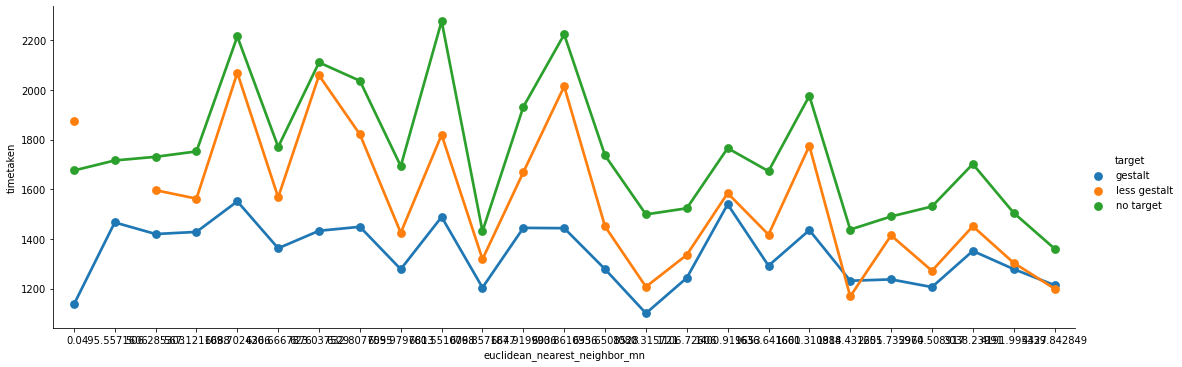

In [50]:
chart = plotMetricByBasemap('euclidean_nearest_neighbor_mn','none')

<Figure size 1080x360 with 0 Axes>

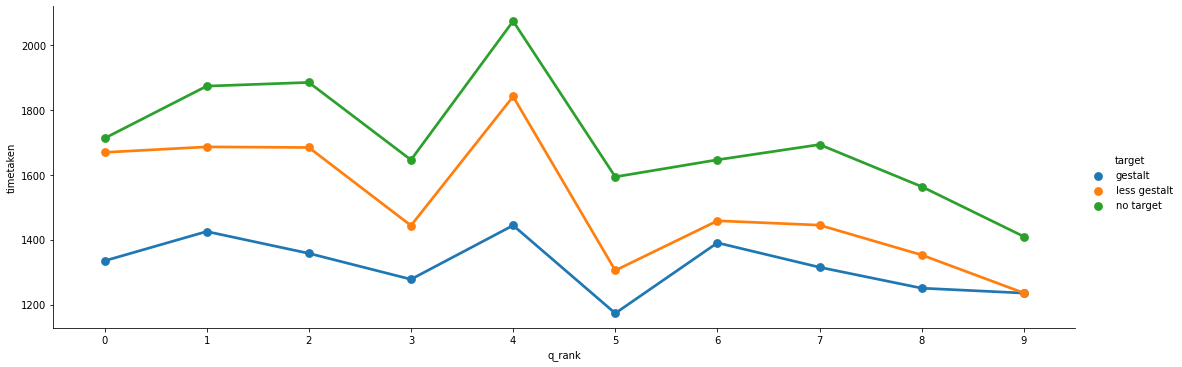

In [51]:
chart = plotMetricByBasemapq('euclidean_nearest_neighbor_mn','none')

<Figure size 1080x360 with 0 Axes>

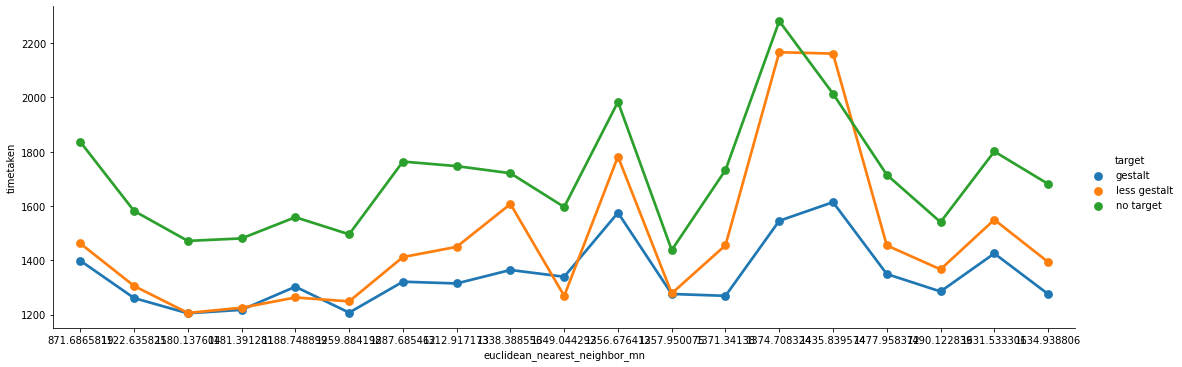

In [52]:
chart = plotMetricByBasemap('euclidean_nearest_neighbor_mn','dark')

<Figure size 1080x360 with 0 Axes>

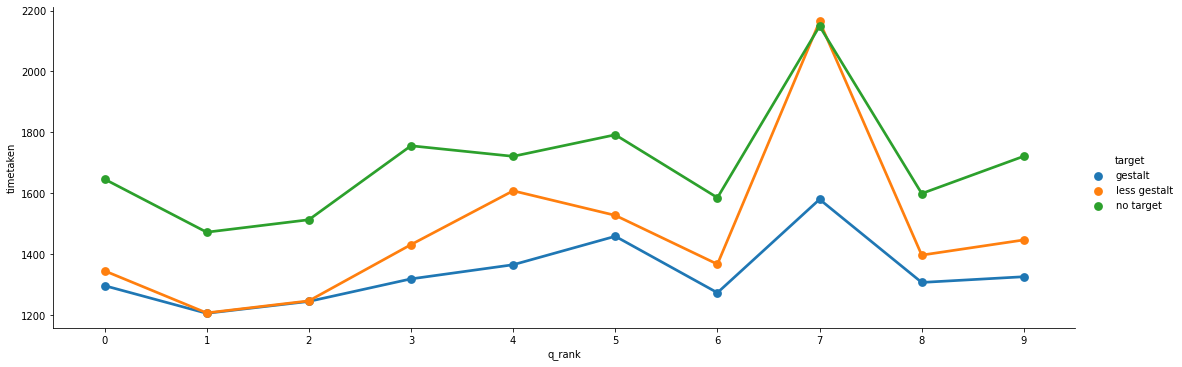

In [53]:
chart = plotMetricByBasemapq('euclidean_nearest_neighbor_mn','dark')

<Figure size 1080x360 with 0 Axes>

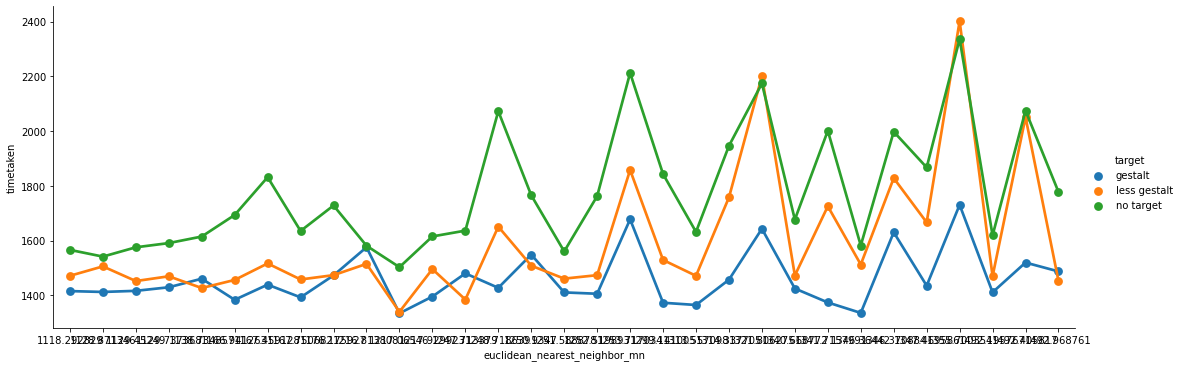

In [54]:
chart = plotMetricByBasemap('euclidean_nearest_neighbor_mn','imagery')

<Figure size 1080x360 with 0 Axes>

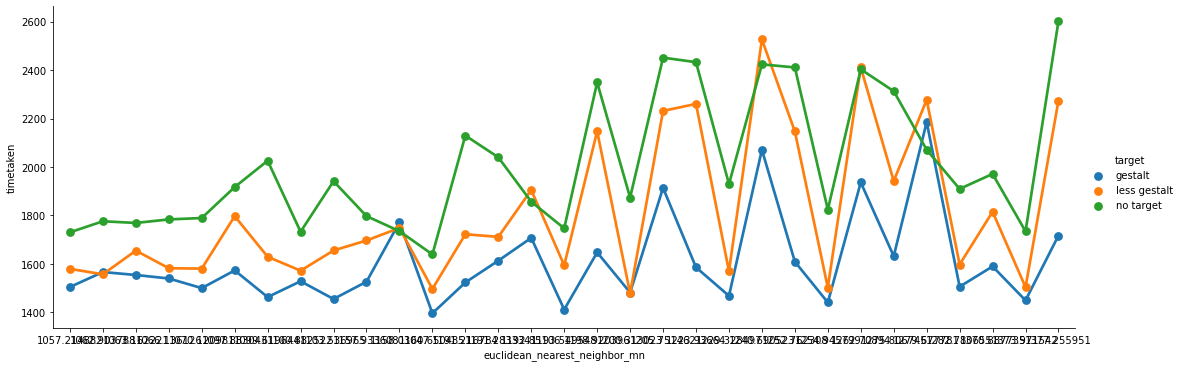

In [55]:
chart = plotMetricByBasemap('euclidean_nearest_neighbor_mn','streets')

<Figure size 1080x360 with 0 Axes>

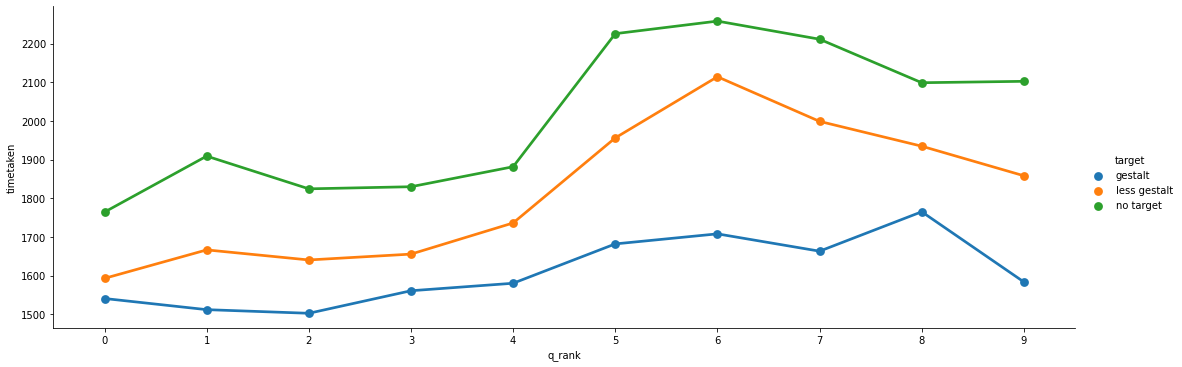

In [56]:
chart = plotMetricByBasemapq('euclidean_nearest_neighbor_mn','streets')

Text(0.5, 1.0, 'gs[-1, -2]')

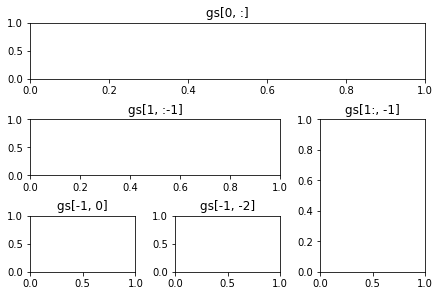

In [57]:
fig3 = plt.figure(constrained_layout=True)
gs = fig3.add_gridspec(3, 3)
f3_ax1 = fig3.add_subplot(gs[0, :])
f3_ax1.set_title('gs[0, :]')

f3_ax2 = fig3.add_subplot(gs[1, :-1])
f3_ax2.set_title('gs[1, :-1]')
f3_ax3 = fig3.add_subplot(gs[1:, -1])
f3_ax3.set_title('gs[1:, -1]')
f3_ax4 = fig3.add_subplot(gs[-1, 0])
f3_ax4.set_title('gs[-1, 0]')
f3_ax5 = fig3.add_subplot(gs[-1, -2])
f3_ax5.set_title('gs[-1, -2]')

<Figure size 1080x360 with 0 Axes>

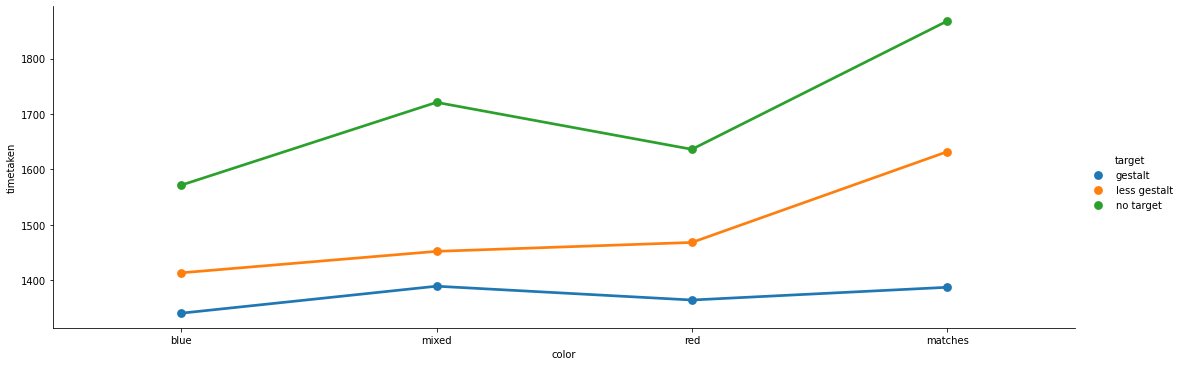

In [58]:
dflim = datadf.loc[datadf['distractor'] == 'random']

plt.figure(figsize=(15,5))
chart = sns.catplot(x="color", y="timetaken", hue="target",  data=dflim, kind="point",
                    hue_order=["gestalt","less gestalt","no target"],
                    order=["blue","mixed","red","matches"],
                    ci=None,height=5, aspect=3)
sns.reset_orig()

<Figure size 1080x360 with 0 Axes>

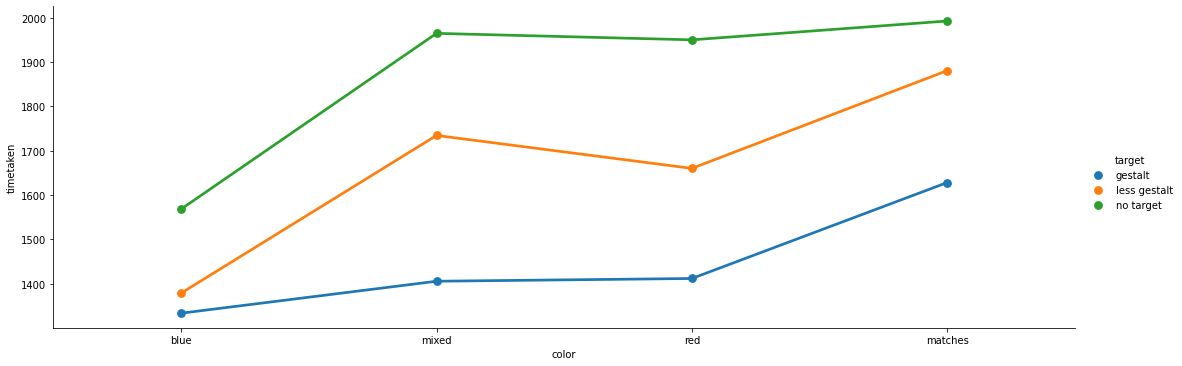

In [59]:
dflim = datadf.loc[datadf['distractor'] == 'clustered']

plt.figure(figsize=(15,5))
chart = sns.catplot(x="color", y="timetaken", hue="target",  data=dflim, kind="point",
                    hue_order=["gestalt","less gestalt","no target"],
                    order=["blue","mixed","red","matches"],
                    ci=None,height=5, aspect=3)
sns.reset_orig()

<Figure size 1080x360 with 0 Axes>

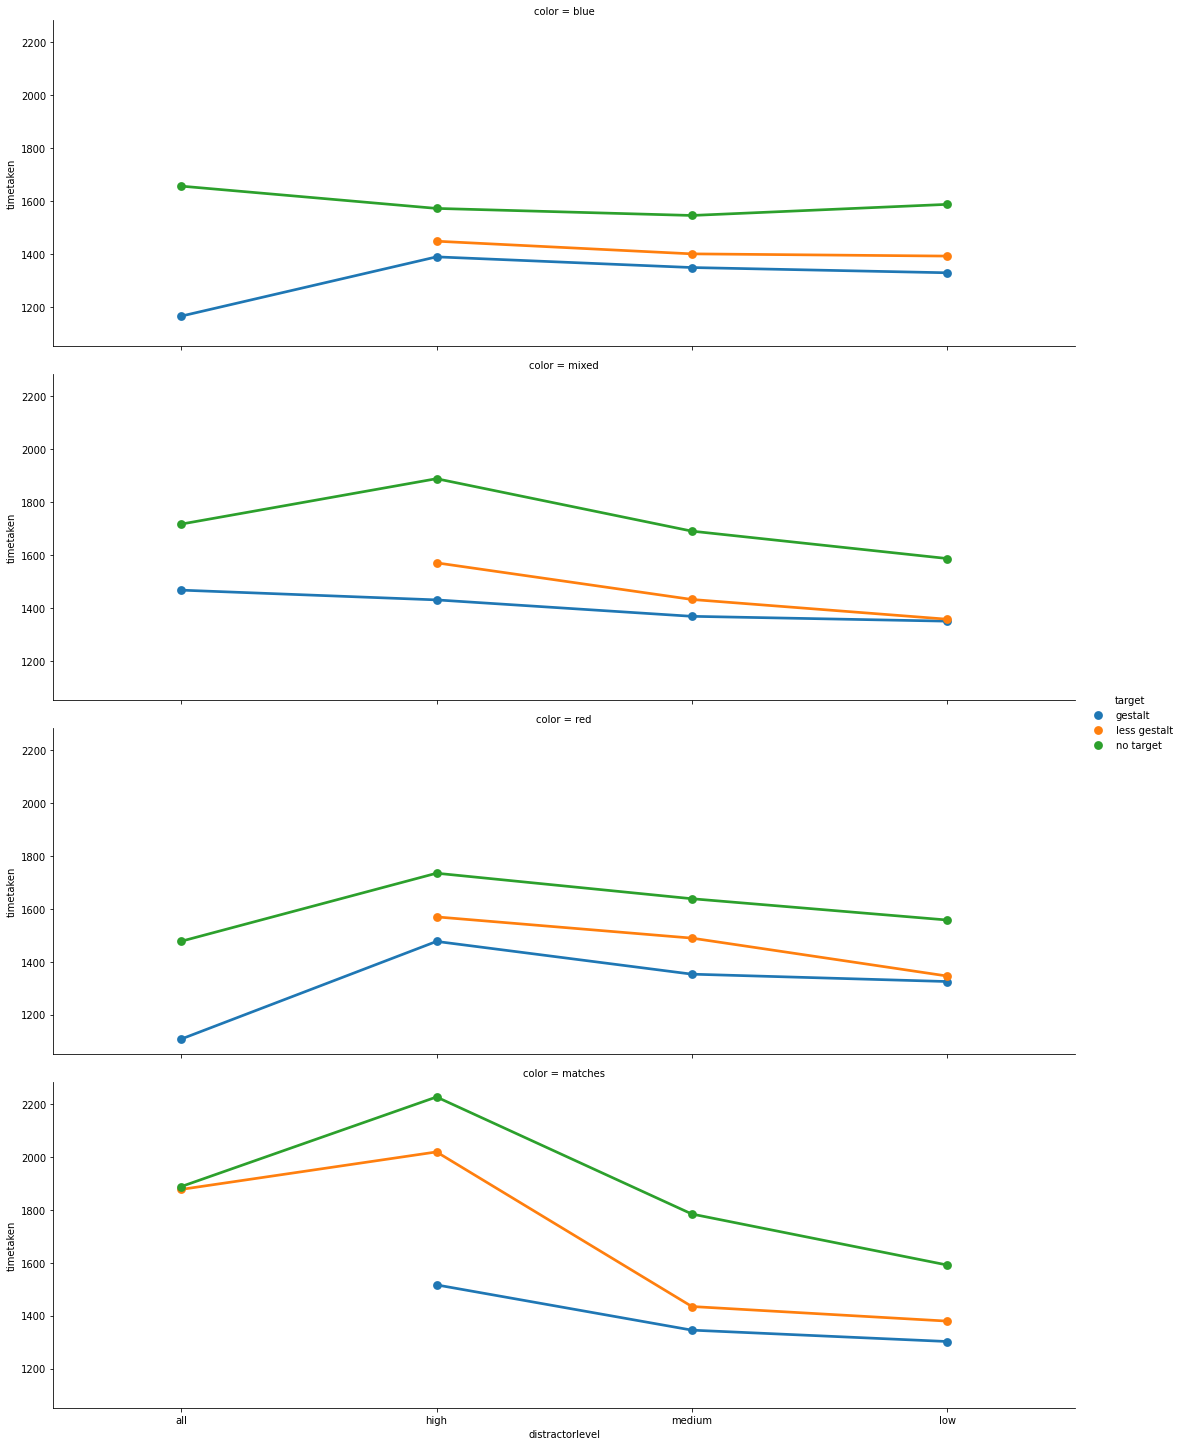

In [60]:
dflim = datadf.loc[datadf['distractor'] == 'random']

plt.figure(figsize=(15,5))
chart = sns.catplot(x="distractorlevel", y="timetaken", hue="target", row="color", data=dflim, kind="point",
                    hue_order=["gestalt","less gestalt","no target"],
                    row_order=["blue","mixed","red","matches"],
                    order=["all","high","medium","low"],
                    ci=None,height=5, aspect=3)
sns.reset_orig()



<Figure size 1080x360 with 0 Axes>

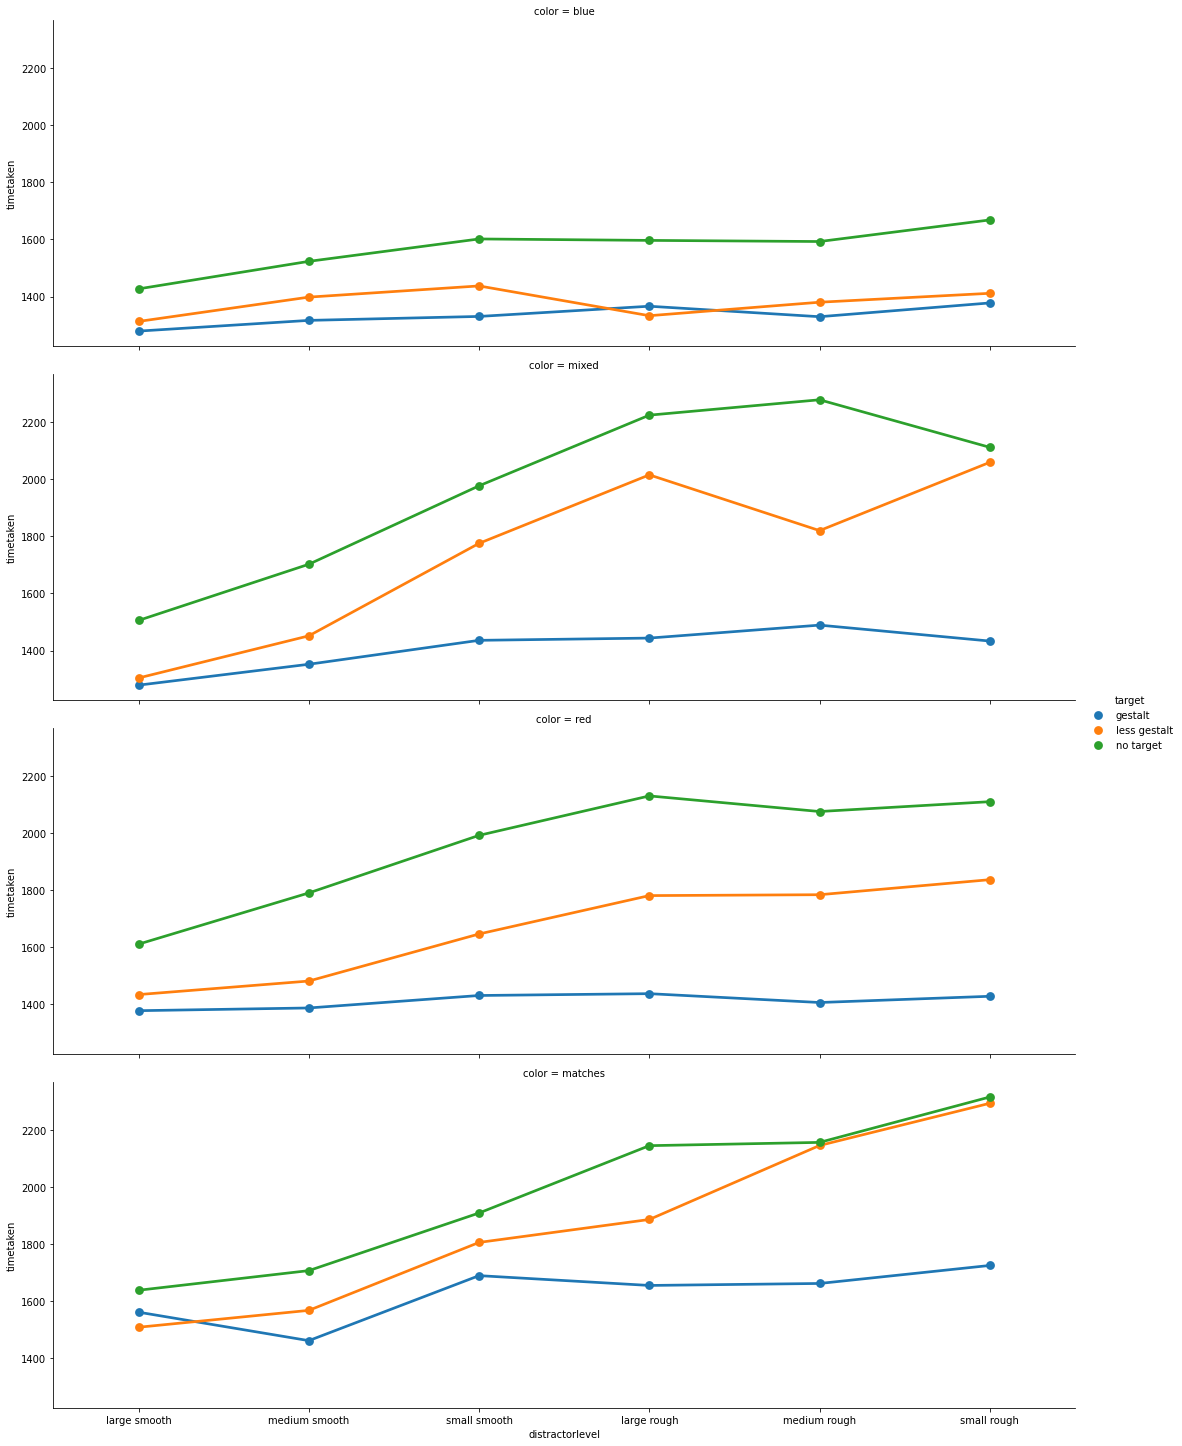

In [61]:
dflim = datadf.loc[datadf['distractor'] == 'clustered']

plt.figure(figsize=(15,5))
chart = sns.catplot(x="distractorlevel", y="timetaken", hue="target", row="color", data=dflim, kind="point",
                    hue_order=["gestalt","less gestalt","no target"],
                    row_order=["blue","mixed","red","matches"],
                    order=["large smooth","medium smooth","small smooth","large rough","medium rough","small rough"],
                    ci=None,height=5, aspect=3)
sns.reset_orig()

